In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def OneHotEncode(y):
    unique_vals=list(np.unique(y))
    trans=np.zeros((y.shape[0],len(unique_vals)))
    
    i=0
    for val in y:
        idx=unique_vals.index(val)
        trans[i][idx]=1
        i+=1
    return trans

In [99]:
OneHotEncode(np.array([0,1,3,5,2]))

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

<h2 style="font-family:'Courier New;"> Getting data</h2>

In [100]:
data_url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data=pd.read_csv(data_url,sep=";")

In [101]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [102]:
feature_list=data.columns[:-1]
label=[data.columns[-1]]

<h2 style="font-family:'Courier New"> Data statistics</h2>

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [104]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [105]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

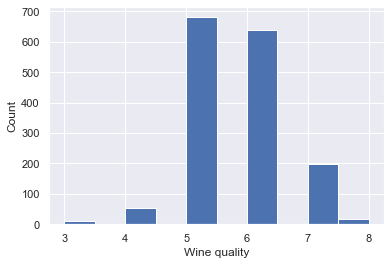

In [106]:
sns.set()
data.quality.hist()
plt.xlabel('Wine quality')
plt.ylabel('Count')

In [107]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [108]:
train_set,test_set=split_train_test(data,0.2)

In [109]:
train_set.shape

(1280, 12)

In [110]:
test_set.shape

(319, 12)

In [111]:
data.shape

(1599, 12)

In [112]:
from sklearn.datasets import load_breast_cancer
d=load_breast_cancer()

In [113]:
d.data.shape

(569, 30)

In [114]:
print(d.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [115]:
from sklearn.model_selection import train_test_split
train_Set,test_Set=train_test_split(data,test_size=0.2,random_state=42)

In [116]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(data,data['quality']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]
    

###### Data visualization 

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

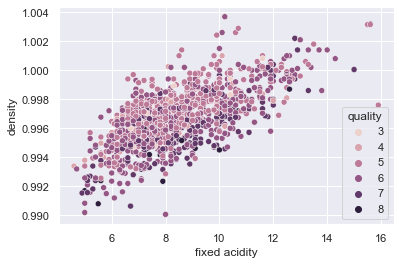

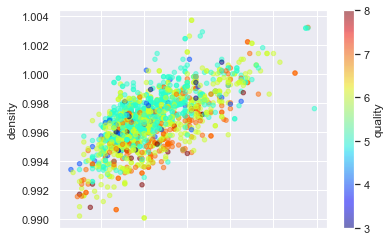

In [117]:
sns.scatterplot(x='fixed acidity',y='density',hue='quality',data=data)
data.plot(kind='scatter',x='fixed acidity',y='density',alpha=0.5,c='quality',cmap=plt.get_cmap('jet'))

In [118]:
corr_matrix=data.corr()
corr_matrix['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

array([[<AxesSubplot:xlabel='citric acid', ylabel='citric acid'>,
        <AxesSubplot:xlabel='pH', ylabel='citric acid'>,
        <AxesSubplot:xlabel='alcohol', ylabel='citric acid'>,
        <AxesSubplot:xlabel='sulphates', ylabel='citric acid'>,
        <AxesSubplot:xlabel='quality', ylabel='citric acid'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='pH'>,
        <AxesSubplot:xlabel='pH', ylabel='pH'>,
        <AxesSubplot:xlabel='alcohol', ylabel='pH'>,
        <AxesSubplot:xlabel='sulphates', ylabel='pH'>,
        <AxesSubplot:xlabel='quality', ylabel='pH'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='pH', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>,
        <AxesSubplot:xlabel='quality', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='sulphates'>,
        <AxesSubplot:xlabel='pH', ylabel='sulphates'>,
        <A

<Figure size 1512x1008 with 0 Axes>

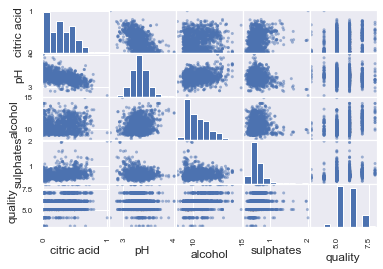

In [119]:
from pandas.plotting import scatter_matrix
attribute_list=['citric acid','pH','alcohol','sulphates','quality']
plt.figure(figsize=(21,14))
scatter_matrix(data[attribute_list])

<h2 style="font-family:'Courier New"> Data preprocessing</h2>

In [120]:
wine_features=strat_train_set.drop('quality',axis=1)

In [121]:
wine_labels=strat_train_set['quality'].copy()

In [122]:
wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [123]:
# If the data has some outliers or missing data which would have been denoted by NaN, then use the following 
# imputer class to replace the values and populate the dataset
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median') #Fills the missing values withe median if used.

imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [124]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [125]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [1]:
# Handling text and categorical attributes
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
# Call fit_transform() method on the ordinal_encoder object to convert text to numbers.
# The list of categories can be obtained via categories_instance variable
# Similarly there is OneHotEncoder() 


In [2]:
from sklearn.preprocessing import OneHotEncoder
help(OneHotEncoder)

Help on class OneHotEncoder in module sklearn.preprocessing._encoders:

class OneHotEncoder(_BaseEncoder)
 |  OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse``
 |  parameter)
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data to many scikit-learn
 |  estimators, notably linear models and SVMs with the standard ker

In [127]:
type(wine_features)

pandas.core.frame.DataFrame

In [128]:
# The transformation Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                             ('std_scaler',StandardScaler()),])
wine_features_tr=transform_pipeline.fit_transform(wine_features)

In [129]:
# Transforming mixed features
from sklearn.compose import ColumnTransformer


In [130]:
from sklearn.datasets import fetch_california_housing
a=fetch_california_housing()

In [131]:
a.data.shape

(20640, 8)

In [132]:
a.target[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [133]:
a.target_names

['MedHouseVal']

In [134]:
from sklearn.datasets import load_iris
a=load_iris()

In [135]:
a.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [136]:
from sklearn.datasets import load_diabetes
x,y= load_diabetes(as_frame=True,return_X_y=True)
x.shape,y.shape

((442, 10), (442,))

In [137]:
type(x),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

<h2 style="font-family:'Courier New"> Selecting and training an ML model </h2>

In [138]:
# quick baseline model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(wine_features_tr,wine_labels)


LinearRegression()

In [139]:
# performance measure on train set
from sklearn.metrics import mean_squared_error
quality_predictions=lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels,quality_predictions)


0.4206571060060278

In [140]:
# performance on test set
wine_features_test=strat_test_set.drop('quality',axis=1)
wine_labels_test=strat_test_set['quality'].copy()
wine_features_test_tr=transform_pipeline.fit_transform(wine_features_test)
quality_test_predictions=lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test,quality_test_predictions)

0.3975913087501518

Text(0, 0.5, 'Predicted quality')

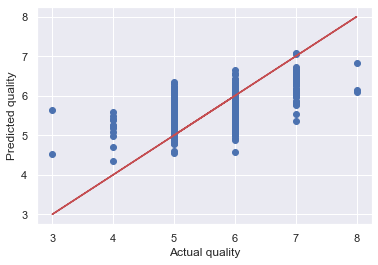

In [141]:
plt.scatter(wine_labels_test,quality_test_predictions)
plt.plot(wine_labels_test,wine_labels_test,'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [142]:
# model makes errors on best and poor quality wines
# another model: DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(wine_features_tr,wine_labels)

DecisionTreeRegressor()

In [143]:
quality_predictions=tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels,quality_predictions)


0.0

In [144]:
quality_test_predictions=tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test,quality_test_predictions)

0.58125

Text(0, 0.5, 'Predicted quality')

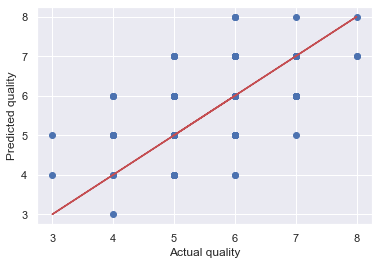

In [145]:
plt.scatter(wine_labels_test,quality_test_predictions)
plt.plot(wine_labels_test,wine_labels_test,'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [146]:
# Cross Validation for robust evaluation of model performance
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())
scores=cross_val_score(lin_reg,wine_features_tr,wine_labels,scoring="neg_mean_squared_error",cv=10)
lin_reg_mse_scores=-scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard Deviation: 0.08356359730413963


In [147]:
# Decision tree CV can also be used
scores=cross_val_score(tree_reg,wine_features_tr,wine_labels,scoring='neg_mean_squared_error',cv=10)
tree_mse_scores=-scores
display_scores(tree_mse_scores)

Scores: [0.6171875  0.6875     0.6328125  0.5078125  0.4609375  0.640625
 0.65625    0.7109375  0.859375   1.07874016]
Mean: 0.6852177657480315
Standard Deviation: 0.16668343331737054


In [148]:
# Lin Reg has better MSE than Decision Tree Regressor
# Random Forest CV
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(wine_features_tr,wine_labels)
scores=cross_val_score(forest_reg,wine_features_tr,wine_labels,scoring='neg_mean_squared_error',cv=10)
forest_mse_scores=-scores
display_scores(forest_mse_scores)

Scores: [0.36989922 0.41363672 0.29063438 0.31722344 0.21798125 0.30233828
 0.27124922 0.38747344 0.42379219 0.46229449]
Mean: 0.34565226131889765
Standard Deviation: 0.0736322184302973


###### Finetuning ML Models

In [149]:
from sklearn.model_selection import GridSearchCV


In [150]:
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

In [151]:
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [152]:
grid_search.fit(wine_features,wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [153]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [154]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(-mean_score,params)


0.5092269199346405 {'max_features': 2, 'n_estimators': 3}
0.3841118566176471 {'max_features': 2, 'n_estimators': 10}
0.3585598039215686 {'max_features': 2, 'n_estimators': 30}
0.4747545615468409 {'max_features': 4, 'n_estimators': 3}
0.3823586397058823 {'max_features': 4, 'n_estimators': 10}
0.36869241217320264 {'max_features': 4, 'n_estimators': 30}
0.47588133169934643 {'max_features': 6, 'n_estimators': 3}
0.3906501225490196 {'max_features': 6, 'n_estimators': 10}
0.3525861315359477 {'max_features': 6, 'n_estimators': 30}
0.4756906998910675 {'max_features': 8, 'n_estimators': 3}
0.3856558517156863 {'max_features': 8, 'n_estimators': 10}
0.35616785811546836 {'max_features': 8, 'n_estimators': 30}
0.43667926198257073 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.38914414828431376 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4479663671023964 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3862261642156863 {'bootstrap': False, 'max_features': 

In [155]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [156]:
# Randomized search
from sklearn.model_selection import RandomizedSearchCV

In [157]:
feature_importances=grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances,feature_list),reverse=True)

[(0.24867116536102707, 'alcohol'),
 (0.1416364273940636, 'sulphates'),
 (0.1266556963936701, 'volatile acidity'),
 (0.0804527251831923, 'total sulfur dioxide'),
 (0.07275072016325314, 'density'),
 (0.058225542967296186, 'citric acid'),
 (0.05791188978825247, 'chlorides'),
 (0.05712441669365611, 'pH'),
 (0.05641645467144794, 'residual sugar'),
 (0.05388861091468476, 'fixed acidity'),
 (0.046266350469456416, 'free sulfur dioxide')]

In [158]:
# Above info can be used to drop some features which are not much important


In [159]:
from sklearn.datasets import load_iris
data=load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [160]:
data.data.shape

(150, 4)

In [161]:
data.data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [162]:
from sklearn.datasets import load_breast_cancer
feature_matrix,labels=load_breast_cancer(return_X_y=True)
feature_matrix.shape

(569, 30)

In [163]:
print(list(labels).count(0),
list(labels).count(1))
data=load_breast_cancer()
print(data.DESCR)

212 357
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is M

In [164]:
from sklearn.datasets import fetch_california_housing
housing_data=fetch_california_housing()
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [165]:
housing_data.target_names

['MedHouseVal']

<h2 style="font-family:'Courier New"> DATA EXTRACTION , IMPUTATION, SCALING, VISUALIZING ETC</h2>

In [166]:
sns.set_theme(style='whitegrid')

In [167]:
# FEATURE EXTRACTION
# Dict Vectorizer

In [168]:
data=[{'age':4, 'height':96.0},
      {'age':1, 'height':73.9},
      {'age':3, 'height':88.9},
      {'age':2, 'height':81.6}]

In [169]:
m=len(data)
n=len(data[0].keys())


In [170]:
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse=False)
data_transformed=dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [171]:
data_transformed.shape

(4, 2)

In [172]:
# DATA IMPUTATION

In [173]:
from sklearn.impute import SimpleImputer
cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
url='https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

In [174]:
heart_data=pd.read_csv(url,header=None,names=cols)

In [175]:
heart_data.shape

(303, 14)

In [176]:
# Check for missing values in dataset

In [177]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [178]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [179]:
print('unique values in ca:',heart_data.ca.unique())
print('unique values in thal:',heart_data.thal.unique()) # ? is the null value identifier that has been present in the dataset

unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
unique values in thal: ['6.0' '3.0' '7.0' '?']


In [180]:
print(heart_data.loc[heart_data.ca=='?','ca'].count(),
heart_data.loc[heart_data.thal == '?','thal'].count())

4 2


In [181]:
# Replacing ? with nan
heart_data.replace('?',np.nan,inplace=True)

In [182]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(heart_data)
heart_data_imputed=imputer.transform(heart_data)
print(heart_data_imputed.shape) 
# add_indicator = False default choice so that it only imputes missing values.

(303, 14)


In [183]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean',add_indicator=True)
# add_indicator = True indicates if the sample has a missing  value.
imputer=imputer.fit(heart_data)
heart_data_imputed_with_indicator=imputer.transform(heart_data)
print(heart_data_imputed_with_indicator.shape)

(303, 16)


In [184]:
# FEATURE SCALING

In [185]:
data_url='https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
cols=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone_data=pd.read_csv(data_url,header=None,names=cols)

In [186]:
abalone_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [187]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [188]:
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [189]:
abalone_data.Sex.unique()
# Convert non-numerical to numerical
abalone_data.replace({'Sex':{'M':1.,'F':2.,'I':3.}},inplace=True)
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


In [190]:
# SEPARATE LABELS FROM FEATURES

In [191]:
y=abalone_data.pop('Rings')
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(8)
memory usage: 261.2 KB


In [192]:
# EXAMINE FEATURE SCALES

In [193]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


In [194]:
# PLOT HISTOGRAMS for each feature

(array([1528.,    0.,    0.,    0.,    0., 1307.,    0.,    0.,    0.,
        1342.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

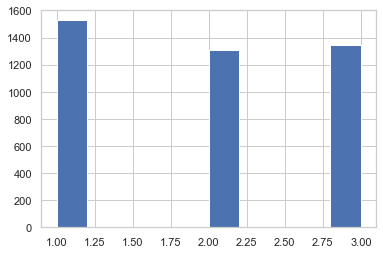

In [195]:
plt.hist('Sex',data=abalone_data)

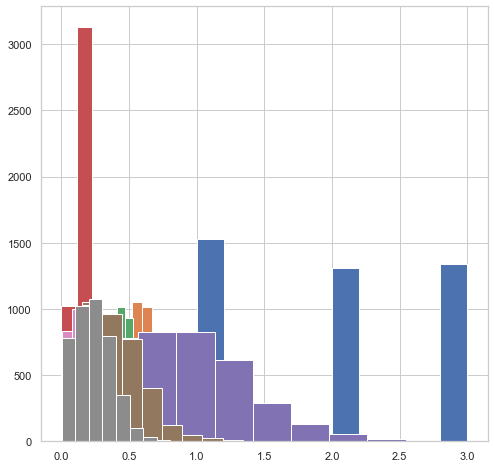

In [196]:
plt.figure(figsize=(8,8))
for col in abalone_data.columns:
    plt.hist(col,data=abalone_data)

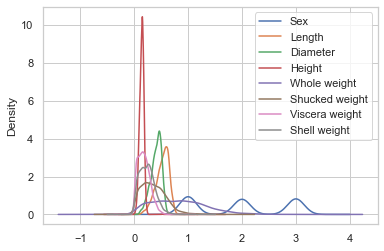

In [197]:
# KDE plot - kernel density plot
ax=abalone_data.plot.kde()

<AxesSubplot:>

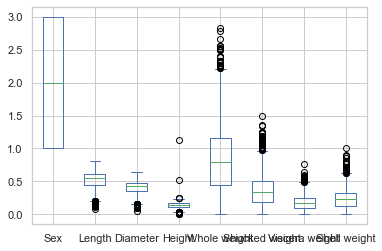

In [198]:
# Box plot
#plt.figure(figsize=(16,8))
abalone_data.plot.box()

In [199]:
# SCALING
# WITH NORMALIZATION
# MAXABSOLUTESCALAR
x=np.array([4,2,5,-2,-100]).reshape(-1,1)
print(x)

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [200]:
from sklearn.preprocessing import MaxAbsScaler
mas=MaxAbsScaler()
X_new=mas.fit_transform(x)
print(X_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


In [201]:
from sklearn.preprocessing import MinMaxScaler
X=abalone_data
mm=MinMaxScaler()
X_normalized=mm.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [202]:
X_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [203]:
X_normalized.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

(array([[1.528e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.307e+03,
         0.000e+00, 0.000e+00, 0.000e+00, 1.342e+03],
        [7.000e+00, 6.000e+01, 1.470e+02, 3.040e+02, 4.600e+02, 7.780e+02,
         1.051e+03, 1.017e+03, 3.240e+02, 2.900e+01],
        [1.300e+01, 6.600e+01, 1.800e+02, 3.440e+02, 5.130e+02, 8.120e+02,
         1.017e+03, 9.340e+02, 2.750e+02, 2.300e+01],
        [1.023e+03, 3.129e+03, 2.300e+01, 0.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
        [6.320e+02, 7.830e+02, 8.270e+02, 8.240e+02, 6.160e+02, 2.860e+02,
         1.290e+02, 5.800e+01, 1.600e+01, 6.000e+00],
        [7.860e+02, 1.052e+03, 9.620e+02, 7.750e+02, 3.990e+02, 1.230e+02,
         4.600e+01, 2.400e+01, 7.000e+00, 3.000e+00],
        [8.350e+02, 9.990e+02, 1.027e+03, 7.470e+02, 3.630e+02, 1.470e+02,
         5.000e+01, 7.000e+00, 1.000e+00, 1.000e+00],
        [7.770e+02, 1.023e+03, 1.078e+03, 7.980e+02, 3.490e+02, 1.040e+02,
         3.300e+01, 9.

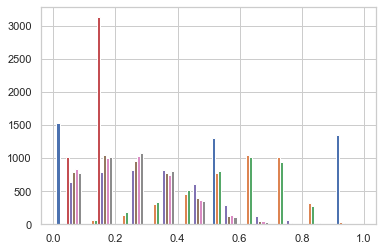

In [204]:
plt.hist(X_normalized)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4c1beea90>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4c1bee280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4c1bee6a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1b4c1be5a60>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b4c1be5d30>,
 'means': []}

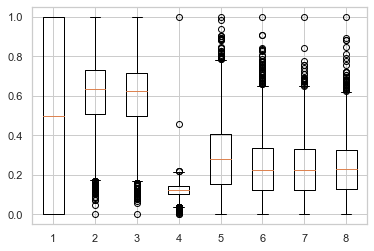

In [205]:
plt.boxplot(X_normalized)

In [206]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_standardized=ss.fit_transform(X)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [207]:
X_standardized.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

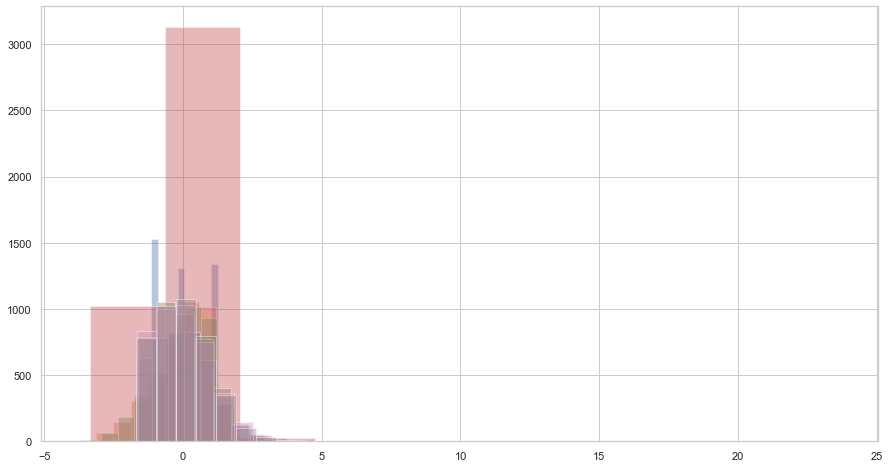

In [208]:
plt.figure(figsize=(15,8))
data=pd.DataFrame(X_standardized,columns=abalone_data.columns)
for col in abalone_data:
    plt.hist(data[col].values,alpha=0.4)


<AxesSubplot:>

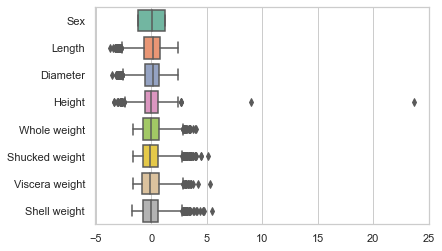

In [209]:
sns.boxplot(data=data,orient='h',palette='Set2')

<AxesSubplot:>

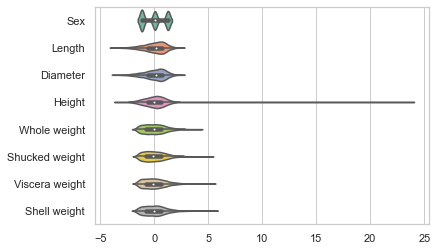

In [210]:
sns.violinplot(data=data,orient='h',palette='Set2')

<h2 style="font-family:'Courier New"> DEMONSTRATION OF DATA TRANSFORMATION, COMPOSITE TRANSFORMERS</h2>

In [211]:
from sklearn.preprocessing import add_dummy_feature
x=np.array(
[[7,1],
[1,8],
[2,0],
[9,6]])
x_new=add_dummy_feature(x)

In [212]:
x_new

array([[1., 7., 1.],
       [1., 1., 8.],
       [1., 2., 0.],
       [1., 9., 6.]])

In [213]:
# CUSTOM TRANSFORMERS
from sklearn.preprocessing import FunctionTransformer


In [214]:
data_url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

In [215]:
wine_data=pd.read_csv(data_url,sep=';')

In [216]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [217]:
transformer=FunctionTransformer(np.log1p,validate=True)
wine_data_transformed=transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed,columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


In [218]:
?np.log1p

In [219]:
# POLYNOMIAL FEATURES

In [220]:
from sklearn.preprocessing import PolynomialFeatures
wine_data=pd.read_csv(data_url,sep=';')
wine_data_copy=wine_data.copy()
wine_data=wine_data.drop(['quality'],axis=1)
print("No. of features before transformation:",wine_data.shape)
poly=PolynomialFeatures(degree=2)
poly_wine_data=poly.fit_transform(wine_data)
print("No. of features after transformation:",poly_wine_data.shape)

No. of features before transformation: (1599, 11)
No. of features after transformation: (1599, 78)


In [221]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x8^2', 'x8 x9', 'x8 x10', 'x9^2', 'x9 x10', 'x10^2']


C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [222]:
# DISCRETIZATION
from sklearn.preprocessing import KBinsDiscretizer

In [223]:
wine_data=wine_data_copy.copy()
enc=KBinsDiscretizer(n_bins=10,encode='onehot')
X=np.array(wine_data['chlorides']).reshape(-1,1)
X_binned=enc.fit_transform(X)

In [224]:
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [225]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [226]:
# HANDLING CATEGORICAL FEATURES

In [227]:
# ONE - HOT ENCODING
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


In [228]:
cols=['sepal length','sepal width','petal length','petal width','label']
iris_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [229]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [230]:
onehotencoder=OneHotEncoder(categories='auto')
print("Shape before encoding",iris_data.shape)
iris_labels=onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1))
print("Shape after encoding",iris_labels.shape)
print("First 5 labels")
print(iris_labels.toarray()[:5])

Shape before encoding (150, 5)
Shape after encoding (150, 3)
First 5 labels
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [231]:
enc=OrdinalEncoder()
iris_labels=np.array(iris_data['label'])
iris_labels_transformed=enc.fit_transform(iris_labels.reshape(-1,1))
print("Unique labels:",np.unique(iris_labels_transformed))
print("First 5 labels:")
print(iris_labels_transformed[:5])

Unique labels: [0. 1. 2.]
First 5 labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [232]:
from sklearn.preprocessing import LabelEncoder
iris_labels=np.array(iris_data['label'])
enc=LabelEncoder()
label_integer=enc.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [233]:
movie_genres=[{'action','comedy'},{'comedy'},{'action','thriller'},{'science-fiction','action','thriller'}]

In [234]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

In [235]:
mlb.classes_

array(['action', 'comedy', 'science-fiction', 'thriller'], dtype=object)

In [236]:
iris_data_onehot=pd.get_dummies(iris_data,columns=['label'],prefix=['one_hot'])

In [237]:
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [238]:
x=[
    [20.0,'male',],
    [11.2,'female'],
    [15.6,'female'],
    [13.0,'male',],
    [18.6,'male',],
    [16.4,'female',]
]
x=np.array(x)

In [239]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler,OneHotEncoder
ct=ColumnTransformer([('scaler',MaxAbsScaler(),[0]),
                     ('pass','passthrough',[0]),
                     ('encoder',OneHotEncoder(),[1])])
ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

In [240]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [241]:
X,y=fetch_california_housing(return_X_y=True)
X,y=X[:2000,:],y[:2000]
transformer=MaxAbsScaler()
regressor=LinearRegression()
regr=TransformedTargetRegressor(regressor=regressor,transformer=transformer)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
regr.fit(X_train,y_train)
print("R2 score of raw label regression:",regr.score(X_test,y_test))
raw_target_regr=LinearRegression().fit(X_train,y_train)
print("R2 score of transformed label regression:",raw_target_regr.score(X_test,y_test))

R2 score of raw label regression: 0.585295411411268
R2 score of transformed label regression: 0.5852954114112681


<h2 style="font-family:'Courier New">DEMONSTRATION OF FEATURE SELECTION, PCA, PIPELINES</h2>

In [242]:
data=[{'age':4, 'height':96.0},
      {'age':1, 'height':73.9},
      {'age':3, 'height':88.9},
      {'age':2, 'height':81.6}]
dv=DictVectorizer(sparse=False)
data_transformed=dv.fit_transform(data)
np.var(data_transformed,axis=0)

array([ 1.25 , 67.735])

In [243]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=9)
data_new=vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

In [244]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

X_california,y_california=fetch_california_housing(return_X_y=True)
X,y=X_california[:2000,:],y_california[:2000]
print("Shape of feature matrix before feature selection:",X.shape)

Shape of feature matrix before feature selection: (2000, 8)


In [245]:
skb=SelectKBest(mutual_info_regression,k=3)
X_new=skb.fit_transform(X,y)
print("Shape of feature matrix after feature selection",X_new.shape)

Shape of feature matrix after feature selection (2000, 3)


In [246]:
from sklearn.feature_selection import SelectPercentile
sp=SelectPercentile(mutual_info_regression,percentile=30)
X_new=sp.fit_transform(X,y)
print('Shape of feature matrix after percentile seletion',X_new.shape)

Shape of feature matrix after percentile seletion (2000, 3)


In [2]:
import numpy as np
?np.linspace

In [247]:
from sklearn.feature_selection import GenericUnivariateSelect
gus=GenericUnivariateSelect(mutual_info_regression,mode='k_best',param=3)
X_new=gus.fit_transform(X,y)
print('Shape before feature selection:',X.shape)
print('Shape after feature selection:',X_new.shape)

Shape before feature selection: (2000, 8)
Shape after feature selection: (2000, 3)


In [1]:
import pandas as pd
help(pd.DataFrame.fillna)

Help on function fillna in module pandas.core.frame:

fillna(self, value: 'object | ArrayLike | None' = None, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool' = False, limit=None, downcast=None) -> 'DataFrame | None'
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap.
    axis : {0 or 'index', 1 or 'columns'}

In [248]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=3,step=1)
selector=selector.fit(X,y)

In [249]:
print(selector.support_) # Tells which features are selected
print(selector.ranking_) 

[ True False False False False False  True  True]
[1 5 4 3 6 2 1 1]


In [250]:
X_new=selector.transform(X)
print('Shape of feature matrix after feature selection',X_new.shape)

Shape of feature matrix after feature selection (2000, 3)


In [251]:
from sklearn.feature_selection import SelectFromModel
estimator=LinearRegression()
estimator.fit(X,y)
print('Coefficients of features',estimator.coef_)
print('Indices of top 3 features',np.argsort(estimator.coef_)[-3:])
t=np.argsort(np.abs(estimator.coef_))[-3:]
model=SelectFromModel(estimator,max_features=3,prefit=True)
X_new=model.transform(X)
print('Shape of feature matrix after feature selection',X_new.shape)

Coefficients of features [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features [1 2 0]
Shape of feature matrix after feature selection (2000, 3)


In [252]:
%%time
from sklearn.feature_selection import SequentialFeatureSelector
estimator=LinearRegression()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=3)
sfs.fit_transform(X,y)
print(sfs.get_support())


[ True False False False False  True  True False]
Wall time: 152 ms


In [253]:
%%time

estimator=LinearRegression()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=3,direction='backward')
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True False False False False  True  True False]
Wall time: 215 ms


In [254]:
sfs.get_support()

array([ True, False, False, False, False,  True,  True, False])

In [255]:
# PCA
X1=np.random.randn(100,2)
X2=3+4*X1+np.random.randn(100,2)


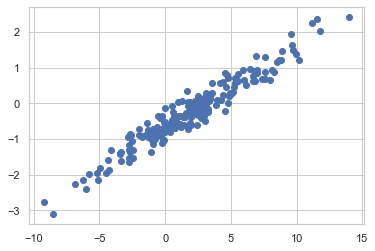

In [256]:
plt.scatter(X2,X1)

In [257]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X1)

PCA(n_components=2)

In [258]:
print('the ',pca.n_components_,'principal axes are',pca.components_)

the  2 principal axes are [[-0.99994067  0.01089278]
 [ 0.01089278  0.99994067]]


In [259]:
print('Explained variance of each component',pca.explained_variance_)

Explained variance of each component [0.98735799 0.72977899]


In [260]:
print('mean across dimensions',pca.mean_)

mean across dimensions [-0.30101081 -0.19715785]


In [261]:
c1,c2=list(zip(pca.components_))
c1=c1[0]
c2=c2[0]

In [262]:
c1,c2

(array([-0.99994067,  0.01089278]), array([0.01089278, 0.99994067]))

In [263]:
projections=X1@pca.components_
print(projections.shape)

(100, 2)


In [264]:
c3=c2+np.random.randn(c2.shape[0])

In [265]:
arbitrary_projection=X1@c3
print(arbitrary_projection.shape)

(100,)


In [266]:
pca=PCA(n_components=1)
pca.fit(X1)
X_pca=pca.transform(X1)
print(X1.shape)
print(X_pca.shape)

(100, 2)
(100, 1)


In [267]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
estimators= [
    ('simpleImputer',SimpleImputer()),
    ('standardScaler',StandardScaler())
]
pipe=Pipeline(steps=estimators)

In [268]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(SimpleImputer(),StandardScaler())

In [269]:
from sklearn.decomposition import PCA
estimators=[
    ('simpleImputer',SimpleImputer()),
    ('pca',PCA()),
    ('regressor',LinearRegression())
]
pipe=Pipeline(steps=estimators)

In [270]:
len(pipe.steps)

3

In [271]:
pipe.steps

[('simpleImputer', SimpleImputer()),
 ('pca', PCA()),
 ('regressor', LinearRegression())]

In [272]:
pipe.named_steps

{'simpleImputer': SimpleImputer(),
 'pca': PCA(),
 'regressor': LinearRegression()}

In [273]:
#ALL ARE SAME ACCESS STATEMENTS

#pipe.named_steps.pca
#pipe.steps[1]
#pipe[1]
#pipe['pca']

In [274]:
estimators=[
     ('simpleImputer',SimpleImputer()),
    ('pca',PCA()),
    ('regressor',LinearRegression())
]
pipe=Pipeline(steps=estimators)
pipe.set_params(pca__n_components=2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

In [275]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid=dict(imputer=['passthrough',
               SimpleImputer(),
               KNNImputer()],
                clf=[SVC(),LogisticRegression()],
                clf__C=[0.1,10,100])
grid_search=GridSearchCV(pipe,param_grid=param_grid)

In [276]:
# CACHING TRANSFORMERS

In [277]:
import tempfile
tempDirPath=tempfile.TemporaryDirectory()

In [278]:
estimators=[
     ('simpleImputer',SimpleImputer()),
    ('pca',PCA(2)),
    ('regressor',LinearRegression())
]
pipe=Pipeline(steps=estimators,memory=tempDirPath)

In [279]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline=Pipeline([ ('selector',ColumnTransformer([('select_first_4',
                                                       'passthrough',
                                                       slice(0,4))])),
                       ('imputer',SimpleImputer(strategy='median')),
                       ('std_scaler',StandardScaler()),
])
cat_pipeline=ColumnTransformer([('label_binarizer',LabelBinarizer(),[4]),])
full_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])


In [280]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

In [281]:
# HANDLING IMBALANCED DATA

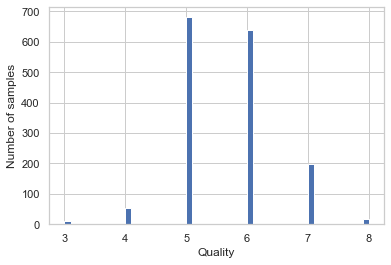

In [282]:
wine_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()


In [283]:
from imblearn.under_sampling import RandomUnderSampler

In [284]:
from collections import Counter
X=wine_data.drop(['quality'],axis=1)
y=wine_data['quality']
undersample=RandomUnderSampler(random_state=0)
X_runs,y_runs=undersample.fit_resample(X,y)
print('Original dataset shape',Counter(y))
print('Resample dataset shape',Counter(y_runs))

Original dataset shape Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


In [285]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X,y)
print('Original dataset shape',Counter(y))
print('Resample dataset shape',Counter(y_ros))

Original dataset shape Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [286]:
X_ros.shape[0]-X.shape[0]

2487

In [287]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_sm,y_sm=oversample.fit_resample(X,y)
counter=Counter(y_sm)
counter

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [288]:
print(X_sm.shape[0]-X.shape[0])

2487


<h2 style="font-family: Courier New"> GRADED ASSIGNMENT - 2 </h2>


In [289]:
data_url='DataPreprocessingGraded_dataset.csv'
graded_data=pd.read_csv(data_url)


In [290]:
graded_data.shape

(748, 6)

In [291]:
graded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    object 
 1   V2      748 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.2+ KB


In [292]:
graded_data.describe()

,V3,V4
count,748.000000,748.000000
mean,1378.676471,34.282086
std,1459.826781,24.376714
min,250.000000,2.000000
25%,500.000000,16.000000
50%,1000.000000,28.000000
75%,1750.000000,50.000000
max,12500.000000,98.000000


In [293]:
for col in graded_data.columns:
    print(col,graded_data[col].unique())

V1 ['2.0' '0.0' '?' '1.0' '4.0' '5.0' '9.0' '3.0' '12.0' '6.0' '11.0' '10.0'
 '13.0' '8.0' '14.0' '7.0' '16.0' '15.0' '23.0' '21.0' '18.0' '22.0'
 '26.0' '35.0' '38.0' '40.0' '74.0' '20.0' '17.0' '25.0' '39.0' '72.0']
V2 ['50.0' '13.0' '?' '20.0' '24.0' '12.0' '9.0' '46.0' '3.0' '10.0' '6.0'
 '5.0' '14.0' '11.0' '8.0' '16.0' '7.0' '2.0' '19.0' '4.0' '17.0' '1.0'
 '15.0' '22.0' '18.0' '38.0' '43.0' '34.0' '44.0' '26.0' '41.0' '21.0'
 '33.0']
V3 [12500.  3250.  4000.  5000.  6000.  1000.  1750.  3000.  2250. 11500.
  5750.   750.  2500.  1500.  1250.  3500.  3750.  2750.  2000.   500.
  4750.  4250.   250.  5500.  4500.  9500. 10750.  8500. 11000.  6500.
 10250.  5250.  8250.]
V4 [98. 28. 35. 45. 77.  4. 14. 22. 58. 47. 15. 11. 48. 49. 16. 40. 34. 21.
 26. 64. 57. 53. 69. 36.  2. 46. 52. 81. 29.  9. 74. 25. 51. 71. 23. 86.
 38. 76. 70. 59. 82. 61. 79. 41. 33. 10. 95. 88. 19. 37. 39. 78. 42. 27.
 24. 63. 43. 75. 73. 50. 60. 17. 72. 62. 30. 31. 65. 89. 87. 93. 83. 32.
 12. 18. 55.  3. 13. 

In [294]:
label=graded_data.pop('Target')

In [295]:
graded_data.shape

(748, 5)

In [296]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

coltrans=ColumnTransformer([('simpleImputer',SimpleImputer(missing_values=np.nan,strategy='mean'),['V1','V2']),
                           ('pass','passthrough',['V3','V4','V5']),
                           ])

In [297]:
graded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    object 
 1   V2      748 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
dtypes: float64(2), object(3)
memory usage: 29.3+ KB


In [298]:
graded_data[:5]

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,?,?,4000.0,35.0,NEGATIVE
3,?,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


In [299]:
graded_data.describe()

,V3,V4
count,748.000000,748.000000
mean,1378.676471,34.282086
std,1459.826781,24.376714
min,250.000000,2.000000
25%,500.000000,16.000000
50%,1000.000000,28.000000
75%,1750.000000,50.000000
max,12500.000000,98.000000


In [300]:
graded_data['V1'].unique()

array(['2.0', '0.0', '?', '1.0', '4.0', '5.0', '9.0', '3.0', '12.0',
       '6.0', '11.0', '10.0', '13.0', '8.0', '14.0', '7.0', '16.0',
       '15.0', '23.0', '21.0', '18.0', '22.0', '26.0', '35.0', '38.0',
       '40.0', '74.0', '20.0', '17.0', '25.0', '39.0', '72.0'],
      dtype=object)

In [301]:
graded_data.replace('?',np.nan,inplace=True)

In [302]:
graded_data=graded_data.astype({'V1':np.float64,'V2':np.float64})

In [303]:
graded_data['V1'].unique()

array([ 2.,  0., nan,  1.,  4.,  5.,  9.,  3., 12.,  6., 11., 10., 13.,
        8., 14.,  7., 16., 15., 23., 21., 18., 22., 26., 35., 38., 40.,
       74., 20., 17., 25., 39., 72.])

In [304]:
graded_data['V2'].unique()

array([50., 13., nan, 20., 24., 12.,  9., 46.,  3., 10.,  6.,  5., 14.,
       11.,  8., 16.,  7.,  2., 19.,  4., 17.,  1., 15., 22., 18., 38.,
       43., 34., 44., 26., 41., 21., 33.])

In [305]:
graded_data.describe()

,V1,V2,V3,V4
count,743.000000,743.000000,748.000000,748.000000
mean,9.562584,5.464334,1378.676471,34.282086
std,8.093527,5.799759,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,3.000000,2.000000,500.000000,16.000000
50%,8.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [306]:
graded_data_tr=coltrans.fit_transform(graded_data)

In [307]:
graded_data[:5]

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,NaN,NaN,4000.0,35.0,NEGATIVE
3,NaN,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


In [308]:
graded_data_tr[:5]

array([[2.0, 50.0, 12500.0, 98.0, 'NEGATIVE'],
       [0.0, 13.0, 3250.0, 28.0, 'NEGATIVE'],
       [9.562584118438762, 5.464333781965006, 4000.0, 35.0, 'NEGATIVE'],
       [9.562584118438762, 20.0, 5000.0, 45.0, 'NEGATIVE'],
       [1.0, 24.0, 6000.0, 77.0, 'NEGATIVE']], dtype=object)

In [309]:
graded_data_df=pd.DataFrame(graded_data_tr,columns=graded_data.columns)

In [310]:
# trans_pipeline=Pipeline([ ('colTrans',ColumnTransformer([
#     ('simpleImp',SimpleImputer(missing_values=np.nan,strategy='mean'),slice(0,2))
# ])),
#     #('passthrou',ColumnTransformer([('pass','passthrough',['V3','V4','V5'])])),
#     ('Ss',ColumnTransformer([('standarScaler',StandardScaler(),slice(0,4))])),
#     ('ordinalEncoder',OrdinalEncoder(),[4]),
# ])
# num_pipeline=Pipeline([ ('selector',ColumnTransformer([('select_first_4',
#                                                        'passthrough',
#                                                        slice(0,4))])),
#                        ('imputer',SimpleImputer(strategy='median')),
#                        ('std_scaler',StandardScaler()),
# ])

In [311]:
graded_data[:5]

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,NaN,NaN,4000.0,35.0,NEGATIVE
3,NaN,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


In [312]:
enc=OrdinalEncoder()
graded_data_df=enc.fit_transform(graded_data_df)

In [313]:
graded_data_df=pd.DataFrame(graded_data_df,columns=graded_data.columns)

In [314]:
ss=StandardScaler()
graded_data_df=ss.fit_transform(graded_data_df)

In [315]:
vt=VarianceThreshold(threshold=0.1)

In [316]:
graded_data_df_tr=vt.fit_transform(graded_data_df)

In [317]:
graded_data_df_tr.shape

(748, 4)

In [318]:
label_tr=enc.fit_transform(np.array(label).reshape(-1,1))

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [319]:
from sklearn.feature_selection import RFE
estimator=LinearRegression()
selector=RFE(estimator)
selector=selector.fit(graded_data_df_tr,label_tr)

In [320]:
selector.ranking_

array([2, 3, 1, 1])

In [321]:
sfs=SequentialFeatureSelector(estimator,direction='forward')
sfs.fit_transform(graded_data_df_tr,label_tr)
print(sfs.get_support())

[ True False  True False]


In [322]:
sfs.get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'n_features_to_select': None,
 'n_jobs': None,
 'scoring': None}

In [323]:
sfs=SequentialFeatureSelector(estimator,direction='backward')
sfs.fit_transform(graded_data_df_tr,label_tr)
print(sfs.get_support())

[ True False  True False]


In [324]:
graded_data[:5]

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,NaN,NaN,4000.0,35.0,NEGATIVE
3,NaN,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


In [325]:
from collections import Counter
Counter(label)

Counter({'YES': 178, 'NO': 570})

In [326]:
graded_data[:5]

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,NaN,NaN,4000.0,35.0,NEGATIVE
3,NaN,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


In [327]:
si=ColumnTransformer([('simpleimp',SimpleImputer(missing_values=np.nan,strategy='median'),['V1'])])
v1=si.fit_transform(graded_data)

In [328]:
dfv1=pd.DataFrame(v1,columns=['V1'])

In [329]:
dfv1.describe()

,V1
count,748.000000
mean,9.552139
std,8.067401
min,0.000000
25%,3.000000
50%,8.000000
75%,14.000000
max,74.000000


In [330]:
knn=ColumnTransformer([('knnimp',KNNImputer(n_neighbors=3,missing_values=np.nan),['V1'])])
knnv1=knn.fit_transform(graded_data)

In [331]:
pd.DataFrame(knnv1,columns=['V1']).describe()

,V1
count,748.000000
mean,9.562584
std,8.066394
min,0.000000
25%,3.000000
50%,8.000000
75%,14.000000
max,74.000000


In [332]:
si=ColumnTransformer([('simp',SimpleImputer(missing_values=np.nan,strategy='mean'),['V2'])])
siv2=si.fit_transform(graded_data)
pd.DataFrame(siv2,columns=['V2']).describe()

,V2
count,748.000000
mean,5.464334
std,5.780316
min,1.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,50.000000


In [333]:
graded_data[:5]

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,NaN,NaN,4000.0,35.0,NEGATIVE
3,NaN,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


 DUMMY BASELINE REGRESSION MODEL

In [334]:
from sklearn.dummy import DummyRegressor
dummy_regr=DummyRegressor(strategy='median')
dummy_regr.fit(X_train,y_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_test,y_test)

-0.0304583817012003

In [335]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sgd=Pipeline([('feature_scaling',StandardScaler()),('sgd_regressor',SGDRegressor())])
sgd.fit(X_train,y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('sgd_regressor', SGDRegressor())])

In [336]:
sgd_reg=SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,penalty=None,learning_rate='constant',eta0=0.0005)

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, learning_curve, ShuffleSplit,permutation_test_score,train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [338]:
np.random.seed(555)
plt.style.use('seaborn')

In [339]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

In [340]:
# DATASETS LOADING
features,labels=fetch_california_housing(as_frame=True,return_X_y=True)

In [341]:
features.shape,labels.shape

((20640, 8), (20640,))

In [342]:
assert features.shape[0]==labels.shape[0]

In [343]:
# DATA EXPLORATION COVERED IN OTHER VIDEO

#PREPROCESSING AND MODEL BUILDING

In [344]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,random_state=42)

In [345]:
train_features.shape,test_features.shape

((15480, 8), (5160, 8))

In [346]:
assert train_features.shape[0]==train_labels.shape[0]

assert test_features.shape[0]==test_labels.shape[0]

In [347]:
# PIPELINE : PROCESSING + MODEL

In [348]:
lin_reg_pipeline=Pipeline([('feature_scaling',StandardScaler()),('lin_reg',LinearRegression())])
lin_reg_pipeline.fit(train_features,train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [349]:
lin_reg_pipeline[-1].intercept_,lin_reg_pipeline[-1].coef_

(2.0703489205426377,
 array([ 0.85210815,  0.12065533, -0.30210555,  0.34860575, -0.00164465,
        -0.04116356, -0.89314697, -0.86784046]))

In [350]:
# MODEL EVALUATION

In [351]:
test_score=lin_reg_pipeline.score(test_features,test_labels)
print("Test set performance",test_score)
train_score=lin_reg_pipeline.score(train_features,train_labels)
print("Model performance on train",train_score)

Test set performance 0.5910509795491352
Model performance on train 0.609873031052925


In [352]:
lin_reg_score=cross_val_score(lin_reg_pipeline,train_features,train_labels,scoring='neg_mean_squared_error',cv=shuffle_split_cv)

print(lin_reg_score)

print("Score of lin reg model on test set","{:.3f}".format(lin_reg_score.mean()),"+/-","{:.3f}".format(lin_reg_score.std()))

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]
Score of lin reg model on test set -0.529 +/- 0.022


In [353]:
lin_reg_mse=-lin_reg_score
print('MSE of linear regression model on the test set',lin_reg_mse.mean(),lin_reg_mse.std())

MSE of linear regression model on the test set 0.5287517875396764 0.022232904569798696


In [354]:
lin_reg_cv_results=cross_validate(lin_reg_pipeline,train_features,train_labels,cv=shuffle_split_cv,scoring='neg_mean_squared_error',
                                  return_train_score=True,return_estimator=True)

In [355]:
lin_reg_cv_results

{'fit_time': array([0.00900173, 0.00900054, 0.00699878, 0.0079987 , 0.00691748,
        0.00800109, 0.00800204, 0.00799918, 0.00799727, 0.0089581 ]),
 'score_time': array([0.00200725, 0.00199723, 0.00200176, 0.00224113, 0.00199056,
        0.00196314, 0.00303268, 0.00300479, 0.00295854, 0.00301409]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

In [356]:
train_error= -1*lin_reg_cv_results['train_score']
test_error=-1*lin_reg_cv_results['test_score']

In [357]:
print("MSE of linear regression model on train set","{:.3f}".format(train_error.mean()),"+/-{:.3f}".format(train_error.std()))
print("MSE of linear regression model on test set","{:.3f}".format(test_error.mean()),"+/-{:.3f}".format(test_error.std()))

MSE of linear regression model on train set 0.519 +/-0.006
MSE of linear regression model on test set 0.529 +/-0.022


In [358]:
def plot_learning_curve(train_sizes,train_scores,test_scores):
    train_scores_mean=np.mean(-train_scores,axis=1)
    train_scores_std=np.std(-train_scores,axis=1)
    test_scores_mean=np.mean(-test_scores,axis=1)
    test_scores_std=np.std(-test_scores,axis=1)
    fit_times_mean=np.mean(fit_times,axis=1)
    fit_times_std=np.std(fit_times,axis=1)
    
    plt.fill_between(
    train_sizes,train_scores_mean-train_scores_std,
    train_scores_mean+train_scores_std,
    alpha=0.1,
    color='r',)
    plt.fill_between(
    train_sizes,test_scores_mean-test_scores_std,
    test_scores_mean+test_scores_std,
    alpha=0.1,
    color='g',)
    
    plt.plot(train_sizes,train_scores_mean,'o-',color='r')
    plt.plot(train_sizes,test_scores_mean,'o-',color='g')
    plt.xlabel('Training samples')
    plt.ylabel('MSE')
    plt.legend(loc='best')

No handles with labels found to put in legend.


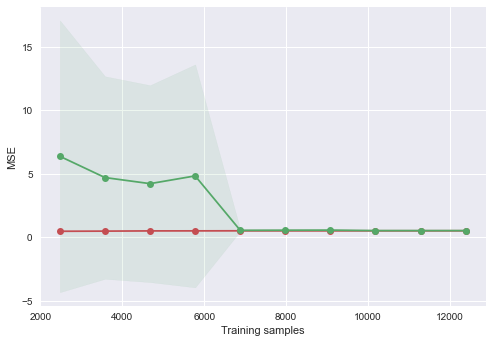

In [359]:
train_sizes,train_scores,test_scores,fit_times,score_times= learning_curve(
    lin_reg_pipeline,train_features,train_labels,cv=shuffle_split_cv,
    scoring='neg_mean_squared_error',n_jobs=1,
    return_times=True,train_sizes=np.linspace(0.2,1.0,10)
    )
plot_learning_curve(train_sizes,train_scores,test_scores)

In [360]:
feature_names=train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

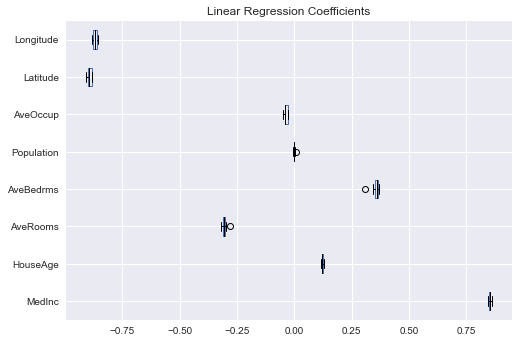

In [361]:
coefs=[est[-1].coef_ for est in lin_reg_cv_results['estimator']]
weights_df=pd.DataFrame(coefs,columns=feature_names)
color={'whiskers':'black','medians':'black','caps':'black'}
weights_df.plot.box(color=color,vert=False)
_=plt.title('Linear Regression Coefficients')

In [362]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


In [363]:
# SELECTING THE BEST MODEL

In [364]:
best_model_index=np.argmin(test_error)
selected_model=lin_reg_cv_results['estimator'][best_model_index]

In [365]:
print(selected_model['lin_reg'].intercept_,selected_model['lin_reg'].coef_)

2.0779898917958657 [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


In [366]:
# MODEL PERFORMANCE

In [367]:
from sklearn.model_selection import cross_val_predict
cv_predictions=cross_val_predict(lin_reg_pipeline,train_features,train_labels)

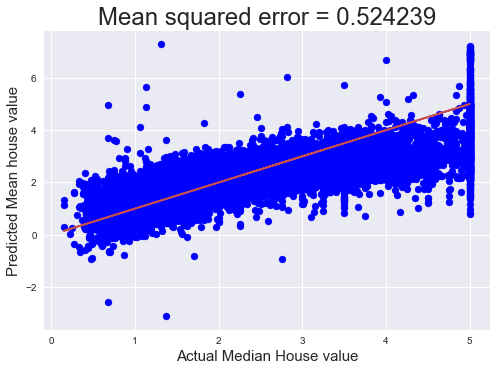

In [368]:
mse_cv=mean_squared_error(train_labels,cv_predictions)
plt.scatter(train_labels,cv_predictions,color='blue')
plt.plot(train_labels,train_labels,'r-')
plt.title(f"Mean squared error = {mse_cv:2f}",size=24)
plt.xlabel('Actual Median House value',size=15)
plt.ylabel('Predicted Mean house value',size=15)
plt.show()

In [369]:
# PREDICTIONS
test_predictions_cv=selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

In [370]:
test_predictions=lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

In [371]:
# REPORT MODEL PERFORMANCE

In [372]:
score_cv=selected_model.score(test_features,test_labels)
score=lin_reg_pipeline.score(test_features,test_labels)
print("R2 SCORE via CV",score_cv)
print("Normal R2 score",score)

R2 SCORE via CV 0.5923577635319088
Normal R2 score 0.5910509795491352


In [373]:
mse=mean_squared_error(test_labels,test_predictions)
mse_cv=mean_squared_error(test_labels,test_predictions_cv)
print('MSE for best model via CV',mse_cv)
print('MSE for model without CV',mse)

MSE for best model via CV 0.5393995876218523
MSE for model without CV 0.5411287478470688


In [374]:
# TRY THE EXERCISES in Linear Regression Demonstration class

In [375]:
# BASELINE MODEL

In [376]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

In [377]:
features,labels=fetch_california_housing(as_frame=True,return_X_y=True)
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,random_state=42)

In [378]:
lin_reg_pipeline=Pipeline([('feature_scaling',StandardScaler()),
                          ('lin_reg',LinearRegression())])
lin_reg_cv_results=cross_validate(lin_reg_pipeline,train_features,train_labels,cv=shuffle_split_cv,scoring='neg_mean_absolute_error',n_jobs=2)
lin_reg_errors=pd.Series(-lin_reg_cv_results['test_score'],name='Linear regression error')

In [379]:
def dummy_regressor_baseline(strategy,constant_val=None,quantile_val=None):
    baseline_model_median=DummyRegressor(strategy=strategy,
                                        constant=constant_val,
                                        quantile=quantile_val)
    baseline_median_cv_results=cross_validate(baseline_model_median,
                                             train_features,train_labels,cv=shuffle_split_cv,scoring='neg_mean_absolute_error',n_jobs=2)
    return pd.Series(-baseline_median_cv_results['test_score'],name='Dummy regressor error')

In [380]:
baseline_median_cv_results_errors=dummy_regressor_baseline(strategy='median')
baseline_mean_cv_results_errors=dummy_regressor_baseline(strategy='mean')
baseline_constant_cv_results_errors=dummy_regressor_baseline(strategy='constant',constant_val=2)
baseline_quantile_cv_results_errors=dummy_regressor_baseline(strategy='quantile',quantile_val=0.55)

In [381]:
dummy_error_df=pd.concat([baseline_median_cv_results_errors,
                         baseline_mean_cv_results_errors,
                         baseline_constant_cv_results_errors,
                         baseline_quantile_cv_results_errors],axis=1)
dummy_error_df.columns=['Median CV','Mean CV','Constant CV','Quantile CV']

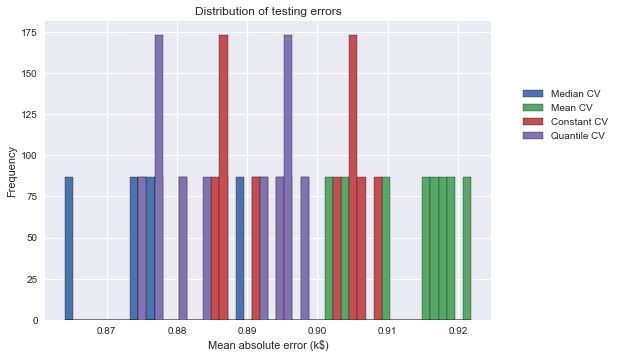

In [382]:
dummy_error_df.plot.hist(bins=50,density=True,edgecolor='black')
plt.legend(bbox_to_anchor=(1.05,0.8),loc='upper left')
plt.xlabel('Mean absolute error (k$)')
_ = plt.title('Distribution of testing errors')

In [383]:
score,permutation_score,pvalue=permutation_test_score(
lin_reg_pipeline,train_features,train_labels,
cv=shuffle_split_cv,scoring='neg_mean_absolute_error',
n_jobs=2,n_permutations=30)
permutation_errors=pd.Series(-permutation_score,name='Permuted error')

In [384]:
print(permutation_score)

[-0.91446539 -0.91608713 -0.91501122 -0.91112203 -0.91326112 -0.91428719
 -0.91694297 -0.90660687 -0.90873595 -0.91546138 -0.9084695  -0.91174023
 -0.91857102 -0.91467076 -0.90396709 -0.91239289 -0.91095499 -0.91729623
 -0.90529415 -0.91436609 -0.91993036 -0.91661883 -0.91104746 -0.91563156
 -0.91014294 -0.91526135 -0.90680247 -0.90796435 -0.91032999 -0.91545574]


In [385]:
error_df=pd.concat([lin_reg_errors,baseline_median_cv_results_errors,permutation_errors],axis=1)


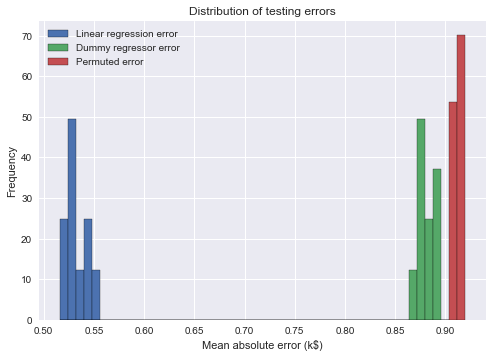

In [386]:
error_df.plot.hist(bins=50,density=True,edgecolor='black')
plt.legend(loc='best')
plt.xlabel('Mean absolute error (k$)')
_ = plt.title('Distribution of testing errors')

In [387]:
#  SGDRegressor

In [388]:
from sklearn.model_selection import validation_curve


In [389]:
np.random.seed(777)

In [390]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

In [391]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
features,labels=fetch_california_housing(as_frame=True,return_X_y=True)
com_train_features,test_features,com_train_labels,test_labels=train_test_split(features,labels,random_state=42)

In [392]:
train_features,dev_features,train_labels,dev_labels=train_test_split(com_train_features,com_train_labels,random_state=42)

In [393]:
# baseline SGDRegressor
# 1) To begin with, we instantiate a baseline SGDregressor model with default parameters
# 2) Train the model with training feature matirx and labels
# 3) Obtain the score on training and development data

In [394]:
from sklearn.metrics import mean_absolute_error
sgd=SGDRegressor(random_state=42)
sgd.fit(train_features,train_labels)
train_mae=mean_absolute_error(sgd.predict(train_features),train_labels)
test_mae=mean_absolute_error(sgd.predict(dev_features),dev_labels)
print("TRAINING ERROR",train_mae)
print('DEVELOPMENT ABSOLUTE ERROR',test_mae)
# DIRECT FITTING HAS SO MUCH ERROR

TRAINING ERROR 309190327803747.2
DEVELOPMENT ABSOLUTE ERROR 311959782899622.1


In [395]:
# PROCESSING AND DOING REGRESSION STEP BY STEP

In [396]:
# FEATURE SCALING

sgd_pipeline=Pipeline([('feature_scaling',StandardScaler()),('sgd',SGDRegressor(random_state=42))])
sgd_pipeline.fit(train_features,train_labels)
print('TRAINING SET ERROR',mean_absolute_error(sgd_pipeline.predict(train_features),train_labels))
print('TEST SET ERROR',mean_absolute_error(sgd_pipeline.predict(dev_features),dev_labels))

TRAINING SET ERROR 0.7263733471565367
TEST SET ERROR 1.0129611556669136


In [397]:
# STEPWISE TRAINING OF SGDRegressor
# 1) Instantiate with warm_start=True, tol=-np.infty
# 2)Train SGD step by step and record regression loss in each step
# 3) Plot learning curves and see if there are any issues in training

Text(0.5, 1.0, 'Learning curve:eta0 = 0.0100')

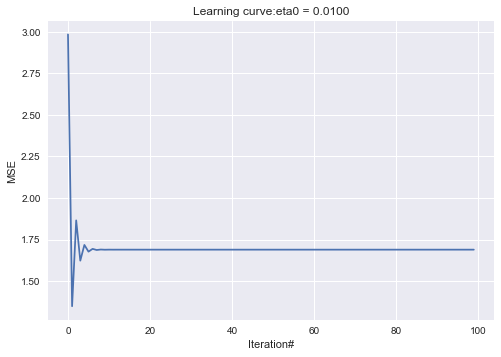

In [398]:
eta0 = 1e-2
sgd_pipeline=Pipeline([('feature_scaling',StandardScaler()),('SGD',SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,random_state=42))])
loss=[]
for epoch in range(100):
    sgd_pipeline.fit(train_features,train_labels)
    loss.append(mean_squared_error(train_labels,sgd_pipeline.predict(train_features)))
plt.plot(np.arange(len(loss)),loss,'b-')
plt.xlabel('Iteration#')
plt.ylabel('MSE')
plt.title(f'Learning curve:eta0 = {eta0:.4f}')
# Large learning rate caused the value to settle at some other point than minimum (Jump value in GD)

Text(0.5, 1.0, 'Learning curve:eta0 = 0.0010')

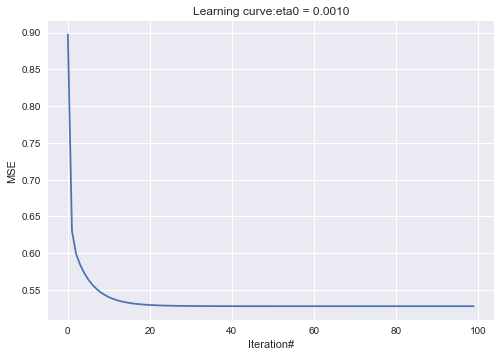

In [399]:
eta0 = 1e-3
sgd_pipeline=Pipeline([('feature_scaling',StandardScaler()),('SGD',SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,
                                                                                eta0=eta0,random_state=42))])
loss=[]
for epoch in range(100):
    sgd_pipeline.fit(train_features,train_labels)
    loss.append(mean_squared_error(train_labels,sgd_pipeline.predict(train_features)))
plt.plot(np.arange(len(loss)),loss,'b-')
plt.xlabel('Iteration#')
plt.ylabel('MSE')
plt.title(f'Learning curve:eta0 = {eta0:.4f}')


In [400]:
print("#Iteration before reaching convergence criteria:",sgd_pipeline[-1].n_iter_) # Complete iteration count
print("#Weight updates:",sgd_pipeline[-1].t_)

#Iteration before reaching convergence criteria: 1
#Weight updates: 11611.0


In [401]:
print("MAE on training set",mean_absolute_error(sgd_pipeline.predict(train_features),train_labels))
print("MAE on dev set",mean_absolute_error(sgd_pipeline.predict(dev_features),dev_labels))

MAE on training set 0.5333732983042573
MAE on dev set 0.5190150280908042


In [402]:
# FIXING LEARNING RATE THROUGH VALIDATION CURVES
# 1) PROVIDE LIST OF VALUES TO BE TRIED FOR A HYPERPARAMETER
# 2) INSTANTIATE AN OBJECT OF validation_curve WITH ESTIMATOR, TRAINING FEATURES AND LABEL. SET scoring PARAMETER
# TO RELEVANT SCORE.
# 3) CONVERT SCORES TO ERROR
# 4) PLOT VALIDATION CURVE WITH THE VALUE OF HYPER PARAMETER ON X-AXIS AND ERROR ON THE Y-AXIS
# 5) FIX THE HYPER-PARAMETER VALUE WHERE THE TEST ERROR IS THE LEAST

In [403]:
%%time
eta0=[1e-5,1e-4,1e-3,1e-2]
train_scores,test_scores=validation_curve(
sgd_pipeline,com_train_features,com_train_labels,param_name='SGD__eta0',
param_range=eta0,cv=shuffle_split_cv,scoring='neg_mean_squared_error',
n_jobs=2)
train_errors, test_errors = - train_scores,-test_scores

Wall time: 451 ms


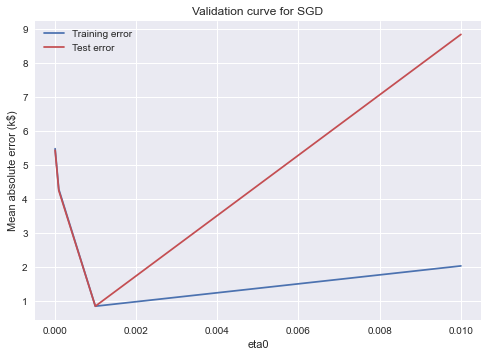

In [404]:
plt.plot(eta0,train_errors.mean(axis=1),'b-x',label='Training error')
plt.plot(eta0,test_errors.mean(axis=1),'r-x',label='Test error')
plt.legend()
plt.xlabel('eta0')
plt.ylabel('Mean absolute error (k$)')
_ = plt.title('Validation curve for SGD')

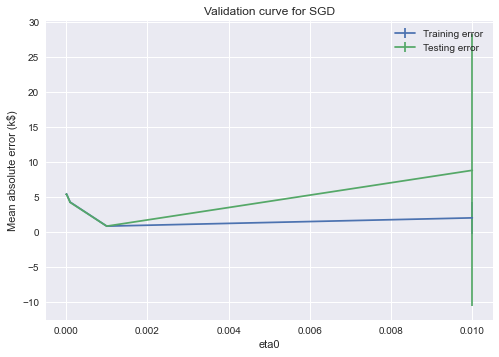

In [405]:
plt.errorbar(eta0,train_errors.mean(axis=1),
            yerr=train_errors.std(axis=1),label='Training error')
plt.errorbar(eta0,test_errors.mean(axis=1),yerr=test_errors.std(axis=1),label='Testing error')
plt.legend()
plt.xlabel('eta0')
plt.ylabel('Mean absolute error (k$)')
_ = plt.title('Validation curve for SGD')

In [406]:
sgd_pipeline=Pipeline([('feature scaling',StandardScaler()),
                      ('sgd',SGDRegressor(max_iter=500,
                                         early_stopping=True,
                                         eta0 = 1e-3,
                                         tol=1e-3,
                                         validation_fraction=0.2,
                                         n_iter_no_change=5,
                                         average=10,
                                         random_state=42))])
sgd_pipeline.fit(train_features,train_labels)
train_mae=mean_absolute_error(train_labels,sgd_pipeline.predict(train_features))
dev_mae=mean_absolute_error(dev_labels,sgd_pipeline.predict(dev_features))
print('MAE on training set',train_mae)
print('MAE on development set',dev_mae)

MAE on training set 0.579376454514559
MAE on development set 0.5689180241137523


In [407]:
print('Number of SGD iterations',sgd_pipeline[-1].n_iter_)
print('Number of weight updates',sgd_pipeline[-1].t_)

Number of SGD iterations 7
Number of weight updates 81271.0


In [408]:
sgd_pipeline=Pipeline([('feature scaling',StandardScaler()),
                      ('sgd',SGDRegressor(max_iter=500,
                                         early_stopping=True,
                                         eta0 = 1e-3,
                                         tol=1e-3,
                                          learning_rate='constant',
                                         validation_fraction=0.2,
                                         n_iter_no_change=5,
                                         average=10,
                                         random_state=42))])
sgd_pipeline.fit(train_features,train_labels)
train_mae=mean_absolute_error(train_labels,sgd_pipeline.predict(train_features))
dev_mae=mean_absolute_error(dev_labels,sgd_pipeline.predict(dev_features))
print('MAE on training set',train_mae)
print('MAE on development set',dev_mae)

MAE on training set 0.5359339681114987
MAE on development set 0.5151099728924144


In [409]:
print('Number of SGD iterations',sgd_pipeline[-1].n_iter_)
print('Number of weight updates',sgd_pipeline[-1].t_)

Number of SGD iterations 8
Number of weight updates 92881.0


In [410]:
sgd_pipeline=Pipeline([('feature scaling',StandardScaler()),
                      ('sgd',SGDRegressor(max_iter=500,
                                         early_stopping=True,
                                         eta0 = 1e-3,
                                         tol=1e-3,
                                          learning_rate='adaptive',
                                         validation_fraction=0.2,
                                         n_iter_no_change=5,
                                         average=10,
                                         random_state=42))])
sgd_pipeline.fit(train_features,train_labels)
train_mae=mean_absolute_error(train_labels,sgd_pipeline.predict(train_features))
dev_mae=mean_absolute_error(dev_labels,sgd_pipeline.predict(dev_features))
print('MAE on training set',train_mae)
print('MAE on development set',dev_mae)
print()
print('Number of SGD iterations',sgd_pipeline[-1].n_iter_)
print('Number of weight updates',sgd_pipeline[-1].t_)

MAE on training set 0.5340193046836148
MAE on development set 0.5198356196858102

Number of SGD iterations 33
Number of weight updates 383131.0


In [411]:
max_iter=np.ceil(1e6/com_train_features.shape[0])
max_iter

65.0

In [412]:
sgd_pipeline=Pipeline([('feature scaling',StandardScaler()),
                      ('sgd',SGDRegressor(max_iter=max_iter,
                                         early_stopping=True,
                                         eta0 = 1e-3,
                                         tol=1e-3,
                                          learning_rate='constant',
                                         validation_fraction=0.2,
                                         n_iter_no_change=5,
                                         average=10,
                                         random_state=42))])
sgd_pipeline.fit(train_features,train_labels)
train_mae=mean_absolute_error(train_labels,sgd_pipeline.predict(train_features))
dev_mae=mean_absolute_error(dev_labels,sgd_pipeline.predict(dev_features))
print('MAE on training set',train_mae)
print('MAE on development set',dev_mae)
print()
print('Number of SGD iterations',sgd_pipeline[-1].n_iter_)
print('Number of weight updates',sgd_pipeline[-1].t_)

MAE on training set 0.5359339681114987
MAE on development set 0.5151099728924144

Number of SGD iterations 8
Number of weight updates 92881.0


In [413]:
# GRADED ASSIGNMENT - 3

In [414]:
from sklearn.datasets import fetch_california_housing
features,labels=fetch_california_housing(as_frame=True,return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(features,labels,random_state=0,shuffle=False,test_size=0.2)

In [415]:
linreg_pipeline=Pipeline([('stdscaler',StandardScaler()),('linreg',LinearRegression())])
linreg_pipeline.fit(X_train,y_train)
from sklearn.metrics import r2_score
r2_score(y_test,linreg_pipeline.predict(X_test))

0.660514059153199

In [416]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,linreg_pipeline.predict(X_test)))

0.7033383507521879

In [417]:
from sklearn.metrics import max_error
max_error(y_test,linreg_pipeline.predict(X_test))

7.26045329295842

In [418]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,linreg_pipeline.predict(X_test))

0.6605500501742702

In [419]:
mean_absolute_error(y_test,linreg_pipeline.predict(X_test))

0.5168526993787042

In [420]:
mean_squared_error(y_test,linreg_pipeline.predict(X_test))

0.4946848356388077

In [421]:
sgd_pipeline=Pipeline([('std',StandardScaler()),('sgd',SGDRegressor(random_state=0))])
sgd_pipeline.fit(X_train,y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('sgd', SGDRegressor(random_state=0))])

In [422]:
sgd_pipeline['sgd'].intercept_

array([2.01123921])

In [423]:
sgd_pipeline['sgd'].coef_

array([ 0.84046697,  0.112331  , -0.41213039,  0.21595971, -0.01781887,
       -0.01480892, -0.87394103, -0.83913104])

In [424]:
features.shape

(20640, 8)

In [425]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [426]:
features.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [427]:
practice_X_train,practice_X_test,practice_y_train,practice_y_test=train_test_split(features,labels,random_state=0,shuffle=False,test_size=0.2)

In [428]:
practice_y_test[:5]

16512    1.656
16513    1.261
16514    0.944
16515    0.919
16516    1.243
Name: MedHouseVal, dtype: float64

In [429]:
practice_X_test[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16512,2.6368,34.0,5.769022,1.051630,1310.0,3.559783,37.72,-121.22
16513,3.6378,17.0,5.432075,1.022642,1802.0,3.400000,37.81,-121.22
16514,2.1186,28.0,4.707581,1.039711,1719.0,3.102888,37.80,-121.22
16515,2.1250,37.0,4.919431,1.052133,521.0,2.469194,37.80,-121.22
16516,2.9950,18.0,4.750988,0.984190,1531.0,3.025692,37.81,-121.21


In [430]:
practice_X_train[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [431]:
practice_y_train.mean()

2.020670313105598

In [432]:
practice_y_test.median()

2.1475

In [433]:
lin_reg_pipeline=Pipeline([('std',StandardScaler()),('linreg',LinearRegression())])
lin_reg_pipeline.fit(practice_X_train,practice_y_train)

Pipeline(steps=[('std', StandardScaler()), ('linreg', LinearRegression())])

In [434]:
lin_reg_pipeline['linreg'].coef_

array([ 0.83817967,  0.12032096, -0.32135834,  0.36456599, -0.00170674,
       -0.04524631, -0.87994217, -0.82634126])

In [435]:
lin_reg_pipeline['linreg'].intercept_

2.020670313105614

In [436]:
# POLYNOMIAL REGRESSION

In [437]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model=Pipeline([
    ('polynomial_transform',PolynomialFeatures(degree=2)),
    ('linear_regression',LinearRegression())
])
poly_model.fit(X_train,y_train)
# Similarly in the place of LinearRegression replace with SGDRegressor() for SGD polynomial regression model

Pipeline(steps=[('polynomial_transform', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [438]:
# CAN USE ONLY INTERACTION FEATURES FOR POLYNOMIAL REGRESSION USING THE:
# PolynomialFeatures(degree=2,interaction_only=True)

In [439]:
from sklearn.datasets import fetch_california_housing
california_housing=fetch_california_housing(as_frame=True)
type(california_housing)
# BUNCH IS A DICTIONARY LIKE OBJECT WITH : data,target,feature_names,DESCR
# EACH OF THESE CAN BE ADDED BY .key 

sklearn.utils.Bunch

In [440]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [441]:
# 20640 instances, 8 attributes

In [442]:
california_housing.data.shape

(20640, 8)

In [443]:
type(california_housing.data)

pandas.core.frame.DataFrame

In [444]:
california_housing.target.shape

(20640,)

In [445]:
type(california_housing.target)

pandas.core.series.Series

In [446]:
california_housing.feature_names # FEATURE NAMES

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [447]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [448]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [449]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [450]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [451]:
(1.4*1024*1024)/20640

71.12434108527131

In [452]:
import seaborn as sns
import matplotlib.pyplot as plt

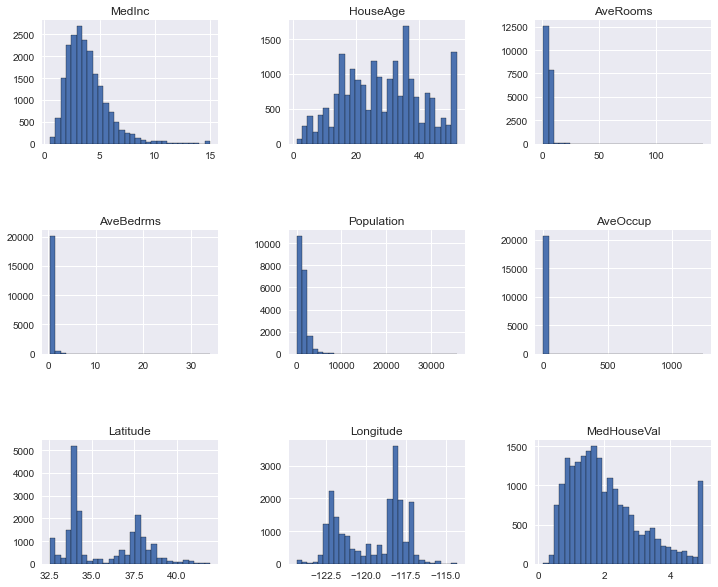

In [453]:
california_housing.frame.hist(figsize=(12,10),bins=30,edgecolor="black")
plt.subplots_adjust(hspace=0.7,wspace=0.4)

<ul>
    <li style="font-family: Courier New; color: yellow"><b>MedInc</b> has a long tail distribution - salary of people is more or less normally distributed with a few folks getting a high salary</li>
    <li style="font-family: Courier New; color: yellow"><b>HouseAge</b> has more or less a uniform distribution</li>
    <li style="font-family: Courier New; color: yellow">The range for features, <b>AveRooms, AveBedrms, AveOccups, Population,</b> is large and it contains a small number of large values. That would mean that there could be certain outlier values present in these features.</li>
    <li style="font-family: Courier New; color: yellow"><b>Latitude and Longitude</b> carry geographical information. Their combination helps us decide price of house.</li>
    <li style="font-family: Courier New; color: yellow"><b>MedHouseVal</b> also has a long tail distribution.It spikes towards the end. The reason is that houses with price more than 5 are given value of 5.</li>
</ul>

In [454]:
california_housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kabali\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

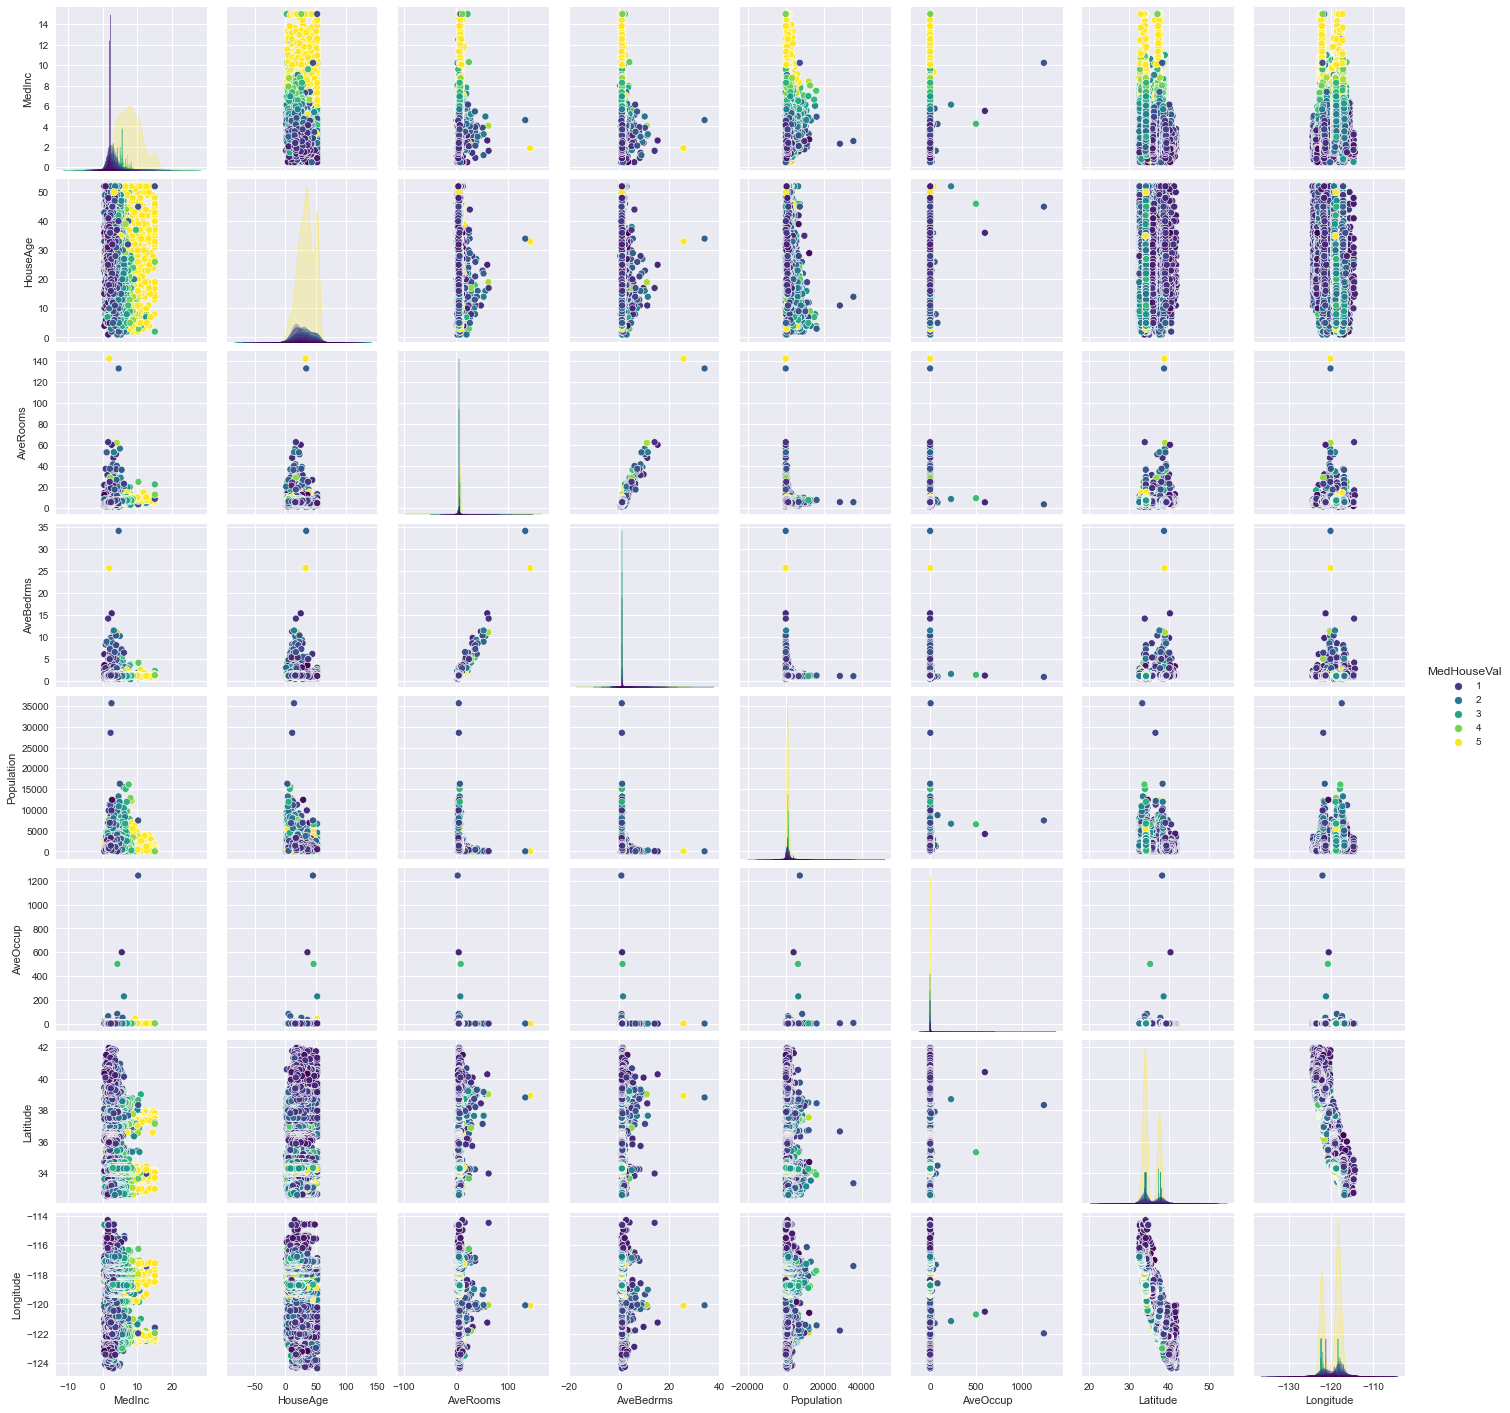

In [455]:
_=sns.pairplot(data=california_housing.frame,hue='MedHouseVal',palette='viridis')

In [456]:
# MedIncome seems to be useful in distinguishing between low and high valued houses.
# A few features have extreme values.
# Latitude and Longitude together seem to distinguish between low and high valued houses.

In [457]:
import numpy as np, pandas as pd,matplotlib.pyplot as plt,seaborn as sns
from scipy.stats import loguniform,uniform
from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_validate,cross_val_score,train_test_split,ShuffleSplit,validation_curve,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline


In [458]:
# Random seed setup
np.random.seed(305)

In [459]:
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

In [460]:
features,labels=fetch_california_housing(return_X_y=True, as_frame=True)
com_train_features,test_features,com_train_labels,test_labels=train_test_split(features,labels,random_state=42)
train_features,dev_features,train_labels,dev_labels=train_test_split(com_train_features,com_train_labels,random_state=42)

In [461]:
lin_reg_pipeline=Pipeline([
    ('feature_scaling',StandardScaler()),
    ('lin_reg',LinearRegression())
])
lin_reg_cv_results=cross_validate(lin_reg_pipeline,com_train_features,com_train_labels,cv=cv,scoring='neg_mean_absolute_error',
                                 return_train_score=True,return_estimator=True)
lin_reg_train_error=-1*lin_reg_cv_results['train_score']
lin_reg_test_error=-1*lin_reg_cv_results['test_score']
print('Mean absolute error of linear regression model on train set: ',f"{lin_reg_train_error.mean():.3f} +/- {lin_reg_train_error.std():.3f}")
print('Mean absolute error of linear regression model on test set: ',f"{lin_reg_test_error.mean():.3f} +/- {lin_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on train set:  0.530 +/- 0.002
Mean absolute error of linear regression model on test set:  0.527 +/- 0.008


In [462]:
sgd_reg_pipeline=Pipeline([
    ('feature_scaling',StandardScaler()),
    ('sgd_reg',SGDRegressor(
    max_iter=np.ceil(1e6/com_train_features.shape[0]),
        early_stopping=True,
        eta0=1e-4,
        learning_rate='constant',
        tol=1e-5,
        validation_fraction=0.1,
        n_iter_no_change=5,
        average=10,
        random_state=42
    ))
])

sgd_reg_cv_results=cross_validate(sgd_reg_pipeline,com_train_features,com_train_labels,cv=cv,scoring='neg_mean_absolute_error',
                                 return_train_score=True,return_estimator=True)
sgd_reg_train_error=-1*sgd_reg_cv_results['train_score']
sgd_reg_test_error=-1*sgd_reg_cv_results['test_score']
print('Mean absolute error of SGD regression model on train set: ',f"{sgd_reg_train_error.mean():.3f} +/- {sgd_reg_train_error.std():.3f}")
print('Mean absolute error of SGD regression model on test set: ',f"{sgd_reg_test_error.mean():.3f} +/- {sgd_reg_test_error.std():.3f}")

Mean absolute error of SGD regression model on train set:  0.564 +/- 0.023
Mean absolute error of SGD regression model on test set:  0.561 +/- 0.025


In [463]:
poly_reg_pipeline=Pipeline([
    ('poly_transform',PolynomialFeatures(degree=2)),
    ('feature_scaling',StandardScaler()),
    ('lin_reg',LinearRegression())
])
poly_reg_cv_results=cross_validate(poly_reg_pipeline,com_train_features,com_train_labels,cv=cv,scoring='neg_mean_absolute_error',
                                 return_train_score=True,return_estimator=True)
poly_reg_train_error=-1*poly_reg_cv_results['train_score']
poly_reg_test_error=-1*poly_reg_cv_results['test_score']
print('Mean absolute error of Polynomial regression model on train set: ',f"{poly_reg_train_error.mean():.3f} +/- {poly_reg_train_error.std():.3f}")
print('Mean absolute error of Polynomial regression model on test set: ',f"{poly_reg_test_error.mean():.3f} +/- {poly_reg_test_error.std():.3f}")

Mean absolute error of Polynomial regression model on train set:  0.461 +/- 0.003
Mean absolute error of Polynomial regression model on test set:  0.485 +/- 0.030


In [464]:
poly_reg_pipeline=Pipeline([
    ('poly_transform',PolynomialFeatures(degree=2,interaction_only=True)),
    ('feature_scaling',StandardScaler()),
    ('lin_reg',LinearRegression())
])
poly_reg_cv_results=cross_validate(poly_reg_pipeline,com_train_features,com_train_labels,cv=cv,scoring='neg_mean_absolute_error',
                                 return_train_score=True,return_estimator=True)
poly_reg_train_error=-1*poly_reg_cv_results['train_score']
poly_reg_test_error=-1*poly_reg_cv_results['test_score']
print('Mean absolute error of Polynomial regression model on train set: ',f"{poly_reg_train_error.mean():.3f} +/- {poly_reg_train_error.std():.3f}")
print('Mean absolute error of Polynomial regression model on test set: ',f"{poly_reg_test_error.mean():.3f} +/- {poly_reg_test_error.std():.3f}")

Mean absolute error of Polynomial regression model on train set:  0.478 +/- 0.003
Mean absolute error of Polynomial regression model on test set:  0.497 +/- 0.024


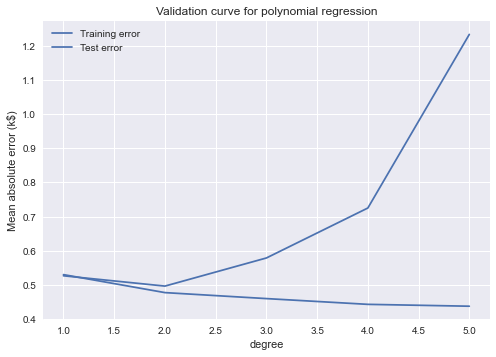

In [465]:
degree=[1,2,3,4,5]
train_scores,test_scores=validation_curve(poly_reg_pipeline,com_train_features,com_train_labels,param_name='poly_transform__degree',
                                         param_range=degree,cv=cv,scoring='neg_mean_absolute_error')
train_errors,test_errors=-train_scores,-test_scores
plt.plot(degree,train_errors.mean(axis=1),'b-x',label='Training error')
plt.plot(degree,test_errors.mean(axis=1),'b-x',label='Test error')
plt.legend()

plt.xlabel('degree')
plt.ylabel('Mean absolute error (k$)' )
_=plt.title('Validation curve for polynomial regression')

In [466]:
ridge_reg_pipeline=Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('feature_scaling',StandardScaler()),
    ('ridge',Ridge(alpha=0.5))
])
ridge_reg_cv_results=cross_validate(ridge_reg_pipeline,
                                   com_train_features,com_train_labels,cv=cv,scoring='neg_mean_absolute_error',return_train_score=True,return_estimator=True)
ridge_train_error=-1*ridge_reg_cv_results['train_score']
ridge_test_error=-1*ridge_reg_cv_results['test_score']

print("Mean absolute error of ridge regression model (alpha=0.5) on train set:",f"{ridge_train_error.mean():.3f}+/-{ridge_train_error.std():.3f}")

Mean absolute error of ridge regression model (alpha=0.5) on train set: 0.481+/-0.003


In [467]:
print("Mean absolute error of ridge regression model (alpha=0.5) on test set:",f"{ridge_test_error.mean():.3f}+/-{ridge_test_error.std():.3f}")

Mean absolute error of ridge regression model (alpha=0.5) on test set: 0.487+/-0.006


In [468]:
alpha_list=np.logspace(-4,0,num=20)
ridge_reg_pipeline=Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('feature_scaling',StandardScaler()),
    ('ridge_cv',RidgeCV(alphas=alpha_list,
    cv=cv,scoring='neg_mean_absolute_error'))
])
ridge_reg_cv_results=ridge_reg_pipeline.fit(com_train_features,com_train_labels)

In [469]:
print("Ridge reg score with best alpha: ",f"{ridge_reg_cv_results[-1].best_score_:.3f}")
print("Error with best alpha: ",f"{-ridge_reg_cv_results[-1].best_score_:.3f}")


Ridge reg score with best alpha:  -0.473
Error with best alpha:  0.473


In [470]:
print("The best value for alpha: ",ridge_reg_cv_results[-1].alpha_)

The best value for alpha:  0.007847599703514606


In [471]:
ridge_grid_pipeline=Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('feature_scaling',StandardScaler()),
    ('ridge',Ridge())
])
param_grid={'poly__degree':(1,2,3),
           'ridge__alpha':np.logspace(-4,0,num=20)}
ridge_grid_search=GridSearchCV(ridge_grid_pipeline,
                              param_grid=param_grid,
                              n_jobs=2,
                              cv=cv,
                              scoring='neg_mean_absolute_error',
                              return_train_score=True)
ridge_grid_search.fit(com_train_features,com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [472]:
mean_train_error=-1*ridge_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
mean_test_error=-1*ridge_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_train_error=ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
std_test_error=ridge_grid_search.cv_results_['std_test_score'][ridge_grid_search.best_index_]
print("Best mean absolute error of polynomial ridge regression model on train set:",f"{mean_train_error:.3f}+/-{std_train_error:.3f}")
print("Best mean absolute error of polynomial ridge regression model on test set:",f"{mean_test_error:.3f}+/-{std_test_error:.3f}")


Best mean absolute error of polynomial ridge regression model on train set: 0.463+/-0.004
Best mean absolute error of polynomial ridge regression model on test set: 0.474+/-0.015


In [473]:
print("Mean cross validated score of best estimator is:",ridge_grid_search.best_score_)
print("Mean cross validaed error of best estimator is:",-ridge_grid_search.best_score_)

Mean cross validated score of best estimator is: -0.4738651177008778
Mean cross validaed error of best estimator is: 0.4738651177008778


In [474]:
print("Best parameter value is:",ridge_grid_search.best_params_)

Best parameter value is: {'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}


In [475]:
lasso_reg_pipeline=Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('feature_scaling',StandardScaler()),
    ('lasso',Lasso(alpha=0.01))
])
lasso_reg_cv_results=cross_validate(lasso_reg_pipeline,
                                   com_train_features,com_train_labels,cv=cv,scoring='neg_mean_absolute_error',return_train_score=True,return_estimator=True)
lasso_train_error=-1*lasso_reg_cv_results['train_score']
lasso_test_error=-1*lasso_reg_cv_results['test_score']

print("Mean absolute error of ridge regression model (alpha=0.5) on train set:",f"{lasso_train_error.mean():.3f}+/-{lasso_train_error.std():.3f}")
print("Mean absolute error of ridge regression model (alpha=0.5) on test set:",f"{lasso_test_error.mean():.3f}+/-{lasso_test_error.std():.3f}")


C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+01, tolerance: 1.654e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.109e+01, tolerance: 1.669e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

Mean absolute error of ridge regression model (alpha=0.5) on train set: 0.529+/-0.003
Mean absolute error of ridge regression model (alpha=0.5) on test set: 0.528+/-0.008


C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+01, tolerance: 1.658e+00
  model = cd_fast.enet_coordinate_descent(


In [476]:
lasso_grid_pipeline=Pipeline([
    ('poly',PolynomialFeatures()),
    ('feature_scaling',StandardScaler()),
    ('lasso',Lasso())
])
param_grid={
    'poly__degree':(1,2,3),
    'lasso__alpha':np.logspace(-4,0,num=20)
}
lasso_grid_search=GridSearchCV(lasso_grid_pipeline,
                              param_grid=param_grid,
                              n_jobs=2,
                              cv=cv,
                              scoring='neg_mean_absolute_error',
                              return_train_score=True)
lasso_grid_search.fit(com_train_features,com_train_labels)

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.638e+03, tolerance: 2.066e+00
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=2,
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
                         'poly__degree': (1, 2, 3)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [477]:
mean_train_error = - 1* lasso_grid_search.cv_results_['mean_train_score'][lasso_grid_search.best_index_]
mean_test_error = - 1* lasso_grid_search.cv_results_['mean_test_score'][lasso_grid_search.best_index_]

std_train_error = - 1* lasso_grid_search.cv_results_['std_train_score'][lasso_grid_search.best_index_]
std_test_score = - 1* lasso_grid_search.cv_results_['std_test_score'][lasso_grid_search.best_index_]
print("Mean absolute error of polynomial ridge regression model on train set:",f"{mean_train_error:.3f}+/-{std_train_error:.3f}")
print("Mean absolute error of polynomial ridge regression model on test set:",f"{mean_test_error:.3f}+/-{std_test_error:.3f}")


Mean absolute error of polynomial ridge regression model on train set: 0.462+/--0.003
Mean absolute error of polynomial ridge regression model on test set: 0.488+/-0.015


In [478]:
print(lasso_grid_search.best_score_)
print(lasso_grid_search.best_params_)

-0.48798304453391383
{'lasso__alpha': 0.0001, 'poly__degree': 3}


In [479]:
poly_sgd_reg_pipeline=Pipeline([
    ('poly',PolynomialFeatures()),
    ('feature_scaling',StandardScaler()),
    ('sgd_reg',SGDRegressor(
        penalty='elasticnet',
        random_state=42
    ))
])

poly_sgd_reg_cv_results=cross_validate(poly_sgd_reg_pipeline,com_train_features,com_train_labels,cv=cv,scoring='neg_mean_absolute_error',
                                 return_train_score=True,return_estimator=True)
poly_sgd_reg_train_error=-1*poly_sgd_reg_cv_results['train_score']
poly_sgd_reg_test_error=-1*poly_sgd_reg_cv_results['test_score']
print('Mean absolute error of SGD regression model on train set: ',f"{poly_sgd_reg_train_error.mean():.3f} +/- {poly_sgd_reg_train_error.std():.3f}")
print('Mean absolute error of SGD regression model on test set: ',f"{poly_sgd_reg_test_error.mean():.3f} +/- {poly_sgd_reg_test_error.std():.3f}")

Mean absolute error of SGD regression model on train set:  10824283052.546 +/- 4423288211.832
Mean absolute error of SGD regression model on test set:  10946788540.250 +/- 5396536227.703


In [480]:
class uniform_int:
    '''
    Integer valued version of uniform distribution
    '''
    def __init__(self,a,b):
        self_distribution=uniform(a,b)
    def rvs(self,*args,**kwargs):
        '''Random variable sample'''
        return self._distribution.rvs(*args,*kwargs).astype(int)

In [481]:
param_distributions={
    'poly__degree':[1,2,3],
    'sgd_reg__learning_rate':['constant','adaptive','invscaling'],
    'sgd_reg__l1_ratio':uniform(0,1),
    'sgd_reg__eta0':loguniform(1e-5,1),
    'sgd_reg__power_t':uniform(0,1)
}
poly_sgd_random_search=RandomizedSearchCV(
poly_sgd_reg_pipeline,param_distributions=param_distributions,
n_iter=10,cv=4,verbose=1,scoring='neg_mean_absolute_error')
poly_sgd_random_search.fit(com_train_features,com_train_labels)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:1509: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:1509: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('feature_scaling',
                                              StandardScaler()),
                                             ('sgd_reg',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=42))]),
                   param_distributions={'poly__degree': [1, 2, 3],
                                        'sgd_reg__eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B4E33CC880>,
                                        'sgd_reg__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B4E026FF70>,
                                        'sgd_reg__learning_rate': ['constant',
                                                                   'adaptive',
                                                                   'invscaling'],
                                        'sgd_reg__power_t': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B4E0264DF0>},
                   scoring='neg_mean_absolute_error', verbose=1)

In [482]:
poly_sgd_random_search.best_score_

-0.5293902320793327

In [483]:
poly_sgd_random_search.best_params_

{'poly__degree': 1,
 'sgd_reg__eta0': 0.34438645031246307,
 'sgd_reg__l1_ratio': 0.09690863686622142,
 'sgd_reg__learning_rate': 'adaptive',
 'sgd_reg__power_t': 0.6862694317051032}

In [484]:
dir(poly_reg_cv_results['estimator'][0][0])
feature_names=poly_reg_cv_results['estimator'][0][0].get_feature_names()

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [485]:
coefs=[est[-1].coef_ for est in poly_reg_cv_results['estimator']]
weights_polynomial_regression=pd.DataFrame(coefs,columns=feature_names)

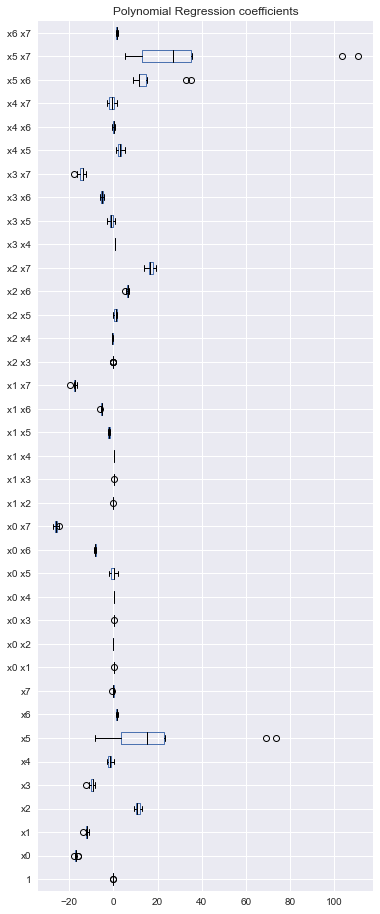

In [486]:
color={'whiskers':'black','medians':'black','caps':'black'}
weights_polynomial_regression.plot.box(color=color,vert=False,figsize=(6,16))
_ =plt.title('Polynomial Regression coefficients')

In [487]:
dir(ridge_reg_cv_results)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_iter',
 '_log_message',
 '_more_tags',
 '_pairwise',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_validate_data',
 '_validate_names',
 '_validate_steps',
 'classe

In [488]:
feature_names=ridge_reg_cv_results['estimator'][0][0].get_feature_names()#input_features=train_features.columns)
feature_names

KeyError: 'estimator'

In [ ]:
baseline_model_median=DummyRegressor(strategy='median')
baseline_model_median.fit(train_features,train_labels)
mean_absolute_percentage_error(test_labels,baseline_model_median.predict(test_features))

In [ ]:
mean_absolute_percentage_error(test_labels,lin_reg_cv_results['estimator'][0].predict(test_features))

In [ ]:
mean_absolute_percentage_error(test_labels,poly_sgd_random_search.best_estimator_.predict(test_features))

In [ ]:
poly_reg_pipeline.fit(com_train_features,com_train_labels)
mean_absolute_percentage_error(test_labels,poly_reg_pipeline.predict(test_features))

In [ ]:
mean_absolute_percentage_error(test_labels,ridge_grid_search.best_estimator_.predict(test_features))

In [ ]:
mean_absolute_percentage_error(test_labels,lasso_grid_search.best_estimator_.predict(test_features))

In [ ]:
# GRADED ASSIGNMENT 4

In [ ]:
graded_data_x,graded_data_y=fetch_california_housing(as_frame=True,return_X_y=True)


In [ ]:
graded_data_x_train,graded_data_x_test,graded_data_y_train,graded_data_y_test=train_test_split(graded_data_x,
                                                                                              graded_data_y,random_state=1,test_size=0.3
                                                                                            )

In [ ]:
graded_grid_pipeline=Pipeline([
    ('feature_scaling',StandardScaler(with_mean=True,with_std=True)),
    ('sgd_reg',SGDRegressor(random_state=1))
])

# param_grid={'poly__degree':(1,2,3),
#            'ridge__alpha':np.logspace(-4,0,num=20)}
# loss='squared_loss'
param_grid={'sgd_reg__loss':('huber','squared_loss'),'sgd_reg__penalty':('l1','l2'),'sgd_reg__alpha':(0.1,0.01,0.001),
           'sgd_reg__max_iter':[1000,2000,5000]}
graded_grid_search=GridSearchCV(graded_grid_pipeline,param_grid=param_grid,cv=4)
graded_grid_search.fit(graded_data_x_train,graded_data_y_train)

In [ ]:
graded_grid_search.score(graded_data_x_test,graded_data_y_test)

In [ ]:
graded_grid_search.best_params_

In [ ]:
graded_x,graded_y=fetch_california_housing(return_X_y=True,as_frame=True)
graded_x_train,graded_x_test,graded_y_train,graded_y_test=train_test_split(graded_x,graded_y,test_size=0.3,random_state=1)

In [ ]:
graded_pipeline=Pipeline([
    ('scaler',StandardScaler(with_mean=True,with_std=True)),
    ('ridge',Ridge())
])
param_grid={
    'ridge__alpha':[0.5,0.1,0.05,0.01,0.005,0.001],
    'ridge__fit_intercept':[True,False]
}
graded_search=GridSearchCV(graded_pipeline,param_grid=param_grid,cv=4)

In [ ]:
graded_search.fit(graded_x_train,graded_y_train)

In [ ]:
graded_search.score(graded_x_test,graded_y_test)

In [ ]:
graded_search.best_params_

In [ ]:
g_x,g_y=fetch_california_housing(as_frame=True,return_X_y=True)
g_x_train,g_x_test,g_y_train,g_y_test=train_test_split(g_x,g_y,random_state=1,test_size=0.4)
g_pipeline=Pipeline([
    ('scaler',StandardScaler(with_mean=True,with_std=True)),
    ('lasso',Lasso())
])
param_grid={
    'lasso__alpha':(0.5,0.1,0.05,0.01,0.005,0.001),
    'lasso__fit_intercept':(False,True)
}
g_grid_search=GridSearchCV(g_pipeline,param_grid=param_grid,cv=6)
g_grid_search.fit(g_x_train,g_y_train)

In [ ]:
g_grid_search.score(g_x_test,g_y_test)

In [ ]:
g_grid_search.best_params_